In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



In [ ]:
os.chdir("/content/drive/MyDrive/DSO 599/project")
!ls

 599project.ipynb		    nyc_cleaned_external.csv
 cbd_per_trip_welfare_results.csv   NY.csv
 cbd_per_trip_welfare_vott.png	    ny_final.csv
 chicago_cleaned_external.csv	    NY_RAW_DATA
 CHI.csv			    Presentation.gdoc
 chi_final.csv			   'Project Discussion.gdoc'
 cleaning_external_dataset.ipynb   'Taxi_Trips_(2024-)_20251101.csv'
'DSO 599 project_ Final.ipynb'	    viz_coefficient_plot.png
'DSO 599 project proposal .gdoc'    viz_distributions.png
 external_datasets		    viz_effect_sizes.png
 final_outcomes.csv		    viz_prepost_comparison.png
'Final Report.gdoc'		    viz_summary_dashboard.png
 final_speed_trends.png		    viz_timeseries_trends.png
 Intro.mov			    viz_weekly_trends.png


# Get CHI.csv (9/1/24-5/31/25)

In [ ]:
#read data between 09/01/2024 - 05/31/2025
df_chicago = pd.read_csv(
    "Taxi_Trips_(2024-)_20251101.csv",
    skiprows=lambda x: x != 0 and x < 2465736,  # KEEP HEADER (x == 0)
    nrows=7318511 - 2465736                   # Number of rows to read
)

/tmp/ipython-input-2963285054.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chicago = pd.read_csv(


In [ ]:
df_chicago

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,d57d6a63502a56ede5da2ce6df5dd43c468edd28,2182f5a35823ac9d08d861dadd787f7fc399428b1b762d...,05/31/2025 12:15:00 AM,05/31/2025 12:15:00 AM,11,0.0,NaN,NaN,NaN,NaN,...,$0.00,$35.50,Credit Card,Sun Taxi,NaN,NaN,NaN,NaN,NaN,NaN
1,d3bbfec5e20c323f531b91fa9bcdc231ee4fe84f,70310ef891a6c3b2bc1ec7968765c6490fd04a8af40d69...,05/31/2025 12:00:00 AM,05/31/2025 12:30:00 AM,"1,740",13.8,NaN,NaN,33.0,56.0,...,$0.00,$35.25,Cash,Taxi Affiliation Services,41.857184,-87.620335,POINT (-87.6203346241 41.8571838585),41.792592,-87.769615,POINT (-87.7696154528 41.7925923603)
2,dd71d2a8f13832fdde7cd8c45d86be1cfc8788c3,70310ef891a6c3b2bc1ec7968765c6490fd04a8af40d69...,05/31/2025 12:00:00 AM,05/31/2025 12:00:00 AM,0,0.0,NaN,NaN,33.0,33.0,...,$0.50,$3.75,Cash,Taxi Affiliation Services,41.857184,-87.620335,POINT (-87.6203346241 41.8571838585),41.857184,-87.620335,POINT (-87.6203346241 41.8571838585)
3,ea75897d98252e7ff1127197d4cf39c9236119af,fea1ad3b44e1a049eb5b1f33d9c53ddd6cae02b095b6a1...,05/31/2025 12:00:00 AM,05/31/2025 12:30:00 AM,"1,800",15.0,NaN,NaN,76.0,NaN,...,$4.00,$47.75,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
4,e38e9e0f1b7e1f1334dde6a24ad3aed7bb07a2ad,444a10db2a60293aca7a7e53b6a65bfae2fb054d213226...,05/31/2025 12:00:00 AM,05/31/2025 12:15:00 AM,801,3.81,NaN,NaN,24.0,21.0,...,$0.00,$15.71,Mobile,Flash Cab,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.938666,-87.711211,POINT (-87.7112105933 41.9386661962)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852770,f633b4da08d7c3cba8add96bcfc0ca3166a009e4,0b0be23bf69b80dd81715f86c4e0887bbd5d9ebc2463b8...,09/01/2024 12:00:00 AM,09/01/2024 12:15:00 AM,727,2.68,NaN,NaN,24.0,8.0,...,$0.00,$12.36,Mobile,Blue Ribbon Taxi Association,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
4852771,e966a7bd38be2ab3557f0d5751da5a660855b651,91a036e3de3c1f459f2664801ea9388870751ae14e196e...,09/01/2024 12:00:00 AM,09/01/2024 12:15:00 AM,930,5.76,NaN,NaN,6.0,8.0,...,$0.00,$50.50,Credit Card,City Service,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
4852772,69231e39b0bab011562972ad59dce4128fb34efe,8c76eb82f069c0731a0049cb78898f02cc5ac6990244c9...,09/01/2024 12:00:00 AM,09/01/2024 12:15:00 AM,"1,028",2.98,NaN,NaN,28.0,7.0,...,$1.50,$20.49,Mobile,Sun Taxi,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
4852773,82a7c19247d125c15ab65bc4f59e91429ec06d74,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,09/01/2024 12:00:00 AM,09/01/2024 12:15:00 AM,918,2.7,NaN,NaN,32.0,33.0,...,$1.00,$12.25,Cash,5 Star Taxi,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.857184,-87.620335,POINT (-87.6203346241 41.8571838585)


In [ ]:
import pandas as pd
from shapely.geometry import Polygon
from shapely import wkt

# -----------------------------
# 1. Normalize all column names
# -----------------------------
df_chicago.columns = (
    df_chicago.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Find which columns look like the pickup/dropoff LOCATION fields
pickup_candidates  = [c for c in df_chicago.columns if "pickup"  in c and "location" in c]
dropoff_candidates = [c for c in df_chicago.columns if "dropoff" in c and "location" in c]

print("Pickup location candidates:", pickup_candidates)
print("Dropoff location candidates:", dropoff_candidates)

if not pickup_candidates or not dropoff_candidates:
    raise ValueError("Could not find pickup/dropoff location columns. Check the printed column list.")

# If there is more than one candidate, you can pick a different one,
# but usually the first is correct.
pickup_col  = pickup_candidates[0]
dropoff_col = dropoff_candidates[0]

print("Using pickup column: ", pickup_col)
print("Using dropoff column:", dropoff_col)

# -----------------------------
# 2. Chicago Loop polygon (lon, lat)
# -----------------------------
loop_poly = Polygon([
    (-87.6295, 41.8830),  # NW
    (-87.6229, 41.8855),  # NE
    (-87.6210, 41.8790),  # SE
    (-87.6298, 41.8783)   # SW
])


# -----------------------------
# 3. Helper: check if WKT POINT is in the Loop
# -----------------------------
def is_in_loop(point_wkt: str) -> bool:
    """Return True if a WKT POINT string is inside the Loop polygon."""
    if pd.isna(point_wkt):
        return False
    try:
        point = wkt.loads(point_wkt)   # parses 'POINT (-87.6333 41.8996)'
    except Exception:
        return False
    return point.within(loop_poly)


# -----------------------------
# 4. Apply to Pickup & Dropoff
# -----------------------------
df_chicago["pickup_in_loop"]  = df_chicago[pickup_col].apply(is_in_loop)
df_chicago["dropoff_in_loop"] = df_chicago[dropoff_col].apply(is_in_loop)

# -----------------------------
# 5. Filter: ANY trip touching the Loop
# -----------------------------
df_loop_either = df_chicago[
    df_chicago["pickup_in_loop"] | df_chicago["dropoff_in_loop"]
]

df_loop_either.head()

df_chicago = df_loop_either

Pickup location candidates: ['pickup_centroid_location']
Dropoff location candidates: ['dropoff_centroid__location']
Using pickup column:  pickup_centroid_location
Using dropoff column: dropoff_centroid__location


In [ ]:
#df_chicago.to_csv('/content/drive/MyDrive/DSO 599/project/chicago_raw_data.csv', index=False)

In [ ]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376772 entries, 7 to 4852773
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trip_id                     376772 non-null  object 
 1   taxi_id                     376772 non-null  object 
 2   trip_start_timestamp        376772 non-null  object 
 3   trip_end_timestamp          376772 non-null  object 
 4   trip_seconds                376739 non-null  object 
 5   trip_miles                  376770 non-null  object 
 6   pickup_census_tract         0 non-null       float64
 7   dropoff_census_tract        0 non-null       float64
 8   pickup_community_area       375270 non-null  float64
 9   dropoff_community_area      370894 non-null  float64
 10  fare                        376353 non-null  object 
 11  tips                        376353 non-null  object 
 12  tolls                       376353 non-null  object 
 13  extras            

In [ ]:
df_chicago = df_chicago.rename(columns={
    "trip_total": "Trip Total",
    "trip_seconds": "Trip Seconds",
    "trip_miles": "Trip Miles",
    "trip_start_timestamp": "Trip Start Timestamp",
    "trip_end_timestamp": "Trip End Timestamp"

})

# drop na and not resonable trip
df_chicago = df_chicago.dropna(subset=['Trip Seconds', 'Trip Miles']).copy()
df_chicago = df_chicago[df_chicago['Trip Seconds'] != 0].copy()
df_chicago = df_chicago[df_chicago['Trip Miles'] != 0].copy()

In [ ]:
# change data type for further use
import pandas as pd

# --- Step 1: Convert timestamps to datetime ---
df_chicago['Trip Start Timestamp'] = pd.to_datetime(df_chicago['Trip Start Timestamp'])
df_chicago['Trip End Timestamp'] = pd.to_datetime(df_chicago['Trip End Timestamp'])

# --- Step 2: Convert Trip Seconds, Trip Miles, and Trip Total to numeric ---
df_chicago['Trip Seconds'] = df_chicago['Trip Seconds'].astype(str).str.replace(r'[^0-9.\-]', '', regex=True).astype(float)
df_chicago['Trip Miles'] = df_chicago['Trip Miles'].astype(str).str.replace(r'[^0-9.\-]', '', regex=True).astype(float)
df_chicago['Trip Total'] = df_chicago['Trip Total'].replace(r'[^0-9.\-]', '', regex=True).replace('', np.nan).astype(float)


In [ ]:
#groupby date and use the

# Calculate speed in miles per hour (mph) ---
df_chicago['Speed_mph'] = df_chicago['Trip Miles'] / (df_chicago['Trip Seconds'] / 3600)

# remove unrealistic speeds
df_chicago = df_chicago.loc[df_chicago['Speed_mph'] <= 100].copy()

# Extract date from Trip Start Timestamp ---
df_chicago['Date'] = df_chicago['Trip Start Timestamp'].dt.date

# Convert Trip Seconds to Trip Minutes
df_chicago["Trip Minutes"] = df_chicago["Trip Seconds"] / 60



# Group by date and compute averages ---
daily_summary = (
    df_chicago.groupby('Date')
    .agg(
        Mean_Speed_mph=('Speed_mph', 'mean'),
        Mean_Trip_Total=('Trip Total', 'mean'),
        Mean_Trip_Minutes=('Trip Minutes', 'mean'),
        Mean_Trip_Miles=('Trip Miles', 'mean'),
        Trip_Count=('Trip Miles', 'count')
    )
    .reset_index()
)

# Display result
daily_summary

,Date,Mean_Speed_mph,Mean_Trip_Total,Mean_Trip_Minutes,Mean_Trip_Miles
0,2024-09-01,17.076620,20.972231,17.266856,5.511567
1,2024-09-02,21.069799,23.515918,18.236855,6.654154
2,2024-09-03,16.559560,21.086382,20.696728,5.643307
3,2024-09-04,16.567229,20.999782,19.899118,5.596708
4,2024-09-05,16.742910,20.926318,20.452253,5.724388
...,...,...,...,...,...
268,2025-05-27,17.629348,21.120425,18.872771,5.712883
269,2025-05-28,16.274036,20.828392,19.439414,5.494921
270,2025-05-29,16.654272,21.749133,20.576411,5.800399
271,2025-05-30,16.128532,21.632156,20.857899,5.597116


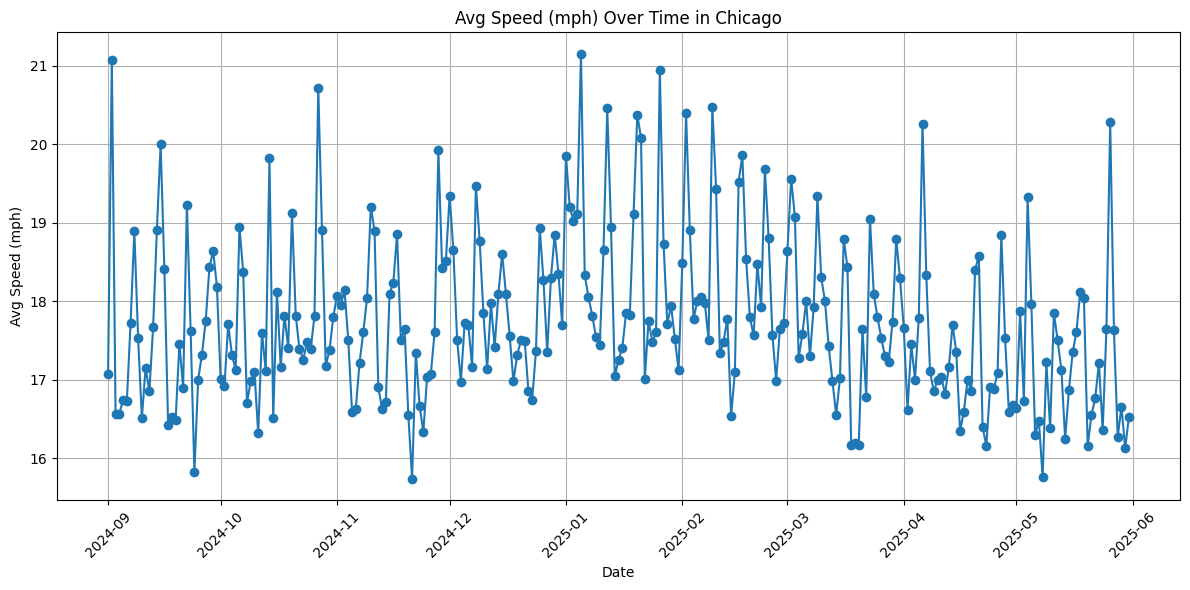

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_summary['Date'], daily_summary['Mean_Speed_mph'], marker='o', linestyle='-')
plt.title('Avg Speed (mph) Over Time in Chicago')
plt.xlabel('Date')
plt.ylabel('Avg Speed (mph)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#save final chicago dataset as CHI.csv
#daily_summary.to_csv('/content/drive/MyDrive/DSO 599/project/CHI.csv', index=False)

# Get NY.CSV (9/1/24-5/31/25)

In [ ]:
import dask.dataframe as dd
import glob

df_ny = dd.read_parquet(glob.glob('/content/drive/MyDrive/DSO 599/project/NY_RAW_DATA/yellow_tripdata_20*.parquet'))
df_ny.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [ ]:
# SELECT THE DESIRE DAY

import dask.dataframe as dd
import glob

# ---- paths ----
path = '/content/drive/MyDrive/DSO 599/project/NY_RAW_DATA/'

# ---- read only needed columns and standardize names ----
dd_y = dd.read_parquet(
    glob.glob(path + 'yellow_tripdata_20*.parquet'),
    columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'total_amount', 'PULocationID', 'DOLocationID']
).rename(columns={
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime'
})

dd_g = dd.read_parquet(
    glob.glob(path + 'green_tripdata_20*.parquet'),
    columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'total_amount', 'PULocationID', 'DOLocationID']
).rename(columns={
    'lpep_pickup_datetime': 'pickup_datetime',
    'lpep_dropoff_datetime': 'dropoff_datetime'
})

# ---- merge yellow + green ----
ddf = dd.concat([dd_y, dd_g], interleave_partitions=True)


###################################################################################################################
#### filter out the row that 'PULocationID' or 'DOLocationID' is not in the manhattan_congestion_zones     ########

manhattan_congestion_zones = [
    50, 48, 230, 163, 161, 229, 246, 68, 100, 186, 164, 170, 233,
    90, 234, 137, 107, 224, 79, 113, 114, 158, 249, 125, 211, 144,
    231, 148, 4, 232, 45, 209, 87, 88, 261, 13, 12, 88
]


ddf = ddf[
    (ddf["PULocationID"].isin(manhattan_congestion_zones)) |
    (ddf["DOLocationID"].isin(manhattan_congestion_zones))
]

###################################################################################################################


############### change desire date here##################
# ---- parse datetimes and basic cleaning ----
ddf['pickup_datetime']  = dd.to_datetime(ddf['pickup_datetime'],  errors='coerce')
ddf['dropoff_datetime'] = dd.to_datetime(ddf['dropoff_datetime'], errors='coerce')
ddf = ddf[ddf['trip_distance'] > 0]                                  # remove zero distance
ddf = ddf[(ddf['pickup_datetime'] >= '2024-09-01') &                  # keep valid window
          (ddf['pickup_datetime'] <= '2025-05-31')]

# ---- ride time & speed ----
ddf['ride_time_min'] = (ddf['dropoff_datetime'] - ddf['pickup_datetime']).dt.total_seconds() / 60
ddf = ddf[ddf['ride_time_min'] > 0]                                   # remove nonpositive durations
ddf['speed_mph'] = ddf['trip_distance'] / (ddf['ride_time_min'] / 60)

# (optional) drop extreme outliers from GPS glitches
ddf = ddf[(ddf['speed_mph'] > 0) & (ddf['speed_mph'] < 100)]




In [ ]:
# group by date and get AVG speed
ddf['date'] = ddf['pickup_datetime'].dt.date
avg_speed_by_day = (
    ddf.groupby('date').agg({
        "speed_mph": "mean",
        "trip_distance": "mean",
        "ride_time_min": "mean",
        "total_amount": "mean",
        "pickup_datetime": "count",
    })
      .rename(columns={"pickup_datetime": "trip_count"})
      .reset_index()
      .compute()
)

avg_speed_by_day = avg_speed_by_day.sort_values('date').reset_index(drop=True)

avg_speed_by_day.head()

,date,speed_mph,trip_distance,ride_time_min,total_amount,trip_count
0,2024-09-01,12.275116,3.546097,15.797411,26.327212,63234
1,2024-09-02,13.977075,4.172171,15.773290,28.948916,54175
2,2024-09-03,10.437770,3.568243,18.799312,29.404428,67269
3,2024-09-04,9.427254,3.241475,19.893130,28.570075,81076
4,2024-09-05,9.199314,3.189150,20.022198,28.798720,91714


In [ ]:
# Give a overview

avg_speed_by_day


,date,speed_mph,trip_distance,ride_time_min,total_amount,trip_count
0,2024-09-01,12.275116,3.546097,15.797411,26.327212,63234
1,2024-09-02,13.977075,4.172171,15.773290,28.948916,54175
2,2024-09-03,10.437770,3.568243,18.799312,29.404428,67269
3,2024-09-04,9.427254,3.241475,19.893130,28.570075,81076
4,2024-09-05,9.199314,3.189150,20.022198,28.798720,91714
...,...,...,...,...,...,...
268,2025-05-27,10.503754,3.452043,18.238223,28.234337,77096
269,2025-05-28,8.894381,3.050828,19.625174,28.007167,99021
270,2025-05-29,9.478570,3.214406,19.106357,28.120212,96122
271,2025-05-30,10.044437,3.234557,18.301728,26.980360,93678


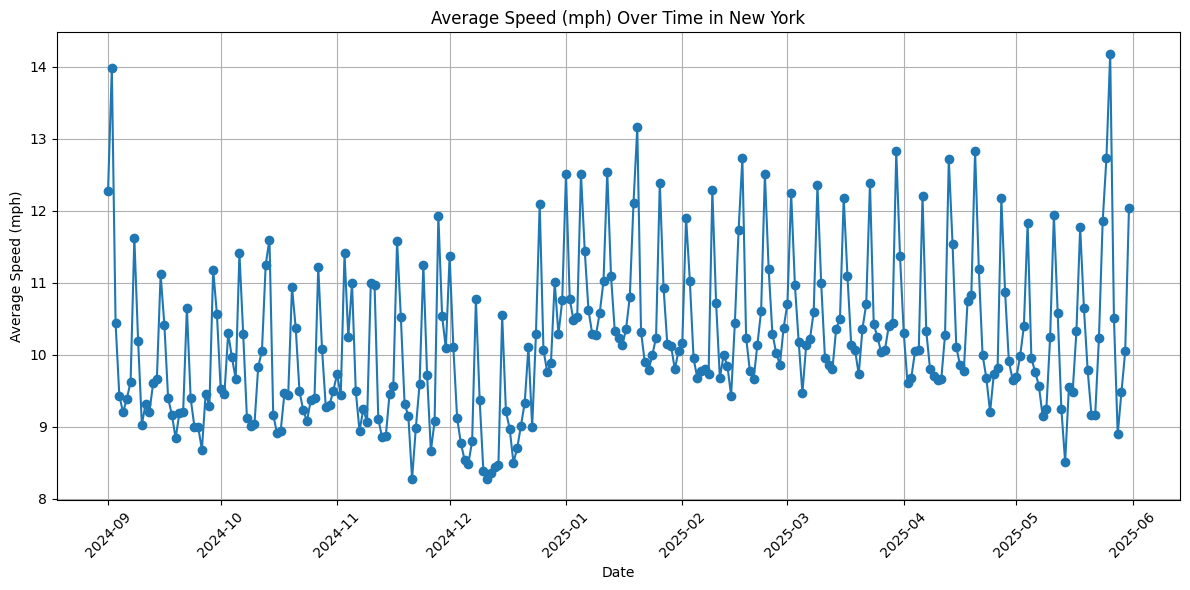

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'date' column is in datetime format for correct plotting
avg_speed_by_day['date'] = pd.to_datetime(avg_speed_by_day['date'])

plt.figure(figsize=(12, 6))
plt.plot(avg_speed_by_day['date'], avg_speed_by_day['speed_mph'], marker='o', linestyle='-')
plt.title('Average Speed (mph) Over Time in New York')
plt.xlabel('Date')
plt.ylabel('Average Speed (mph)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Save NY data as csv
#avg_speed_by_day.to_csv('/content/drive/MyDrive/DSO 599/project/NY.csv', index=False)


# Prove Parallel Trend Assumption

In [ ]:
chi = pd.read_csv('CHI.csv')
ny = pd.read_csv('NY.csv')



In [ ]:
ny['date'] = pd.to_datetime(ny['date'])
ny = ny[(ny['date'] >= '2024-09-01') & (ny['date'] <= '2024-12-31')].copy()
ny

,date,speed_mph,trip_distance,ride_time_min,total_amount
0,2024-09-01,12.275116,3.546097,15.797411,26.327212
1,2024-09-02,13.977075,4.172171,15.773290,28.948916
2,2024-09-03,10.437770,3.568243,18.799312,29.404428
3,2024-09-04,9.427254,3.241475,19.893130,28.570075
4,2024-09-05,9.199314,3.189150,20.022198,28.798720
...,...,...,...,...,...
117,2024-12-27,9.754789,3.290478,19.562859,28.185345
118,2024-12-28,9.888423,3.042488,18.749094,25.834561
119,2024-12-29,11.008682,3.401863,18.588457,27.249445
120,2024-12-30,10.281227,3.391942,19.085040,27.823434


In [ ]:
chi['Date'] = pd.to_datetime(chi['Date'])
chicago = chi[(chi['Date'] >= '2024-09-01') & (chi['Date'] <= '2024-12-31')].copy()
chicago

,Date,Mean_Speed_mph,Mean_Trip_Total,Mean_Trip_Minutes,Mean_Trip_Miles
0,2024-09-01,17.076620,20.972231,17.266856,5.511567
1,2024-09-02,21.069799,23.515918,18.236855,6.654154
2,2024-09-03,16.559560,21.086382,20.696728,5.643307
3,2024-09-04,16.567229,20.999782,19.899118,5.596708
4,2024-09-05,16.742910,20.926318,20.452253,5.724388
...,...,...,...,...,...
117,2024-12-27,17.353070,19.791685,16.577397,5.319473
118,2024-12-28,18.302500,19.918882,15.369296,5.336711
119,2024-12-29,18.848496,20.790163,16.310703,5.625905
120,2024-12-30,18.353954,19.879206,16.282452,5.566108


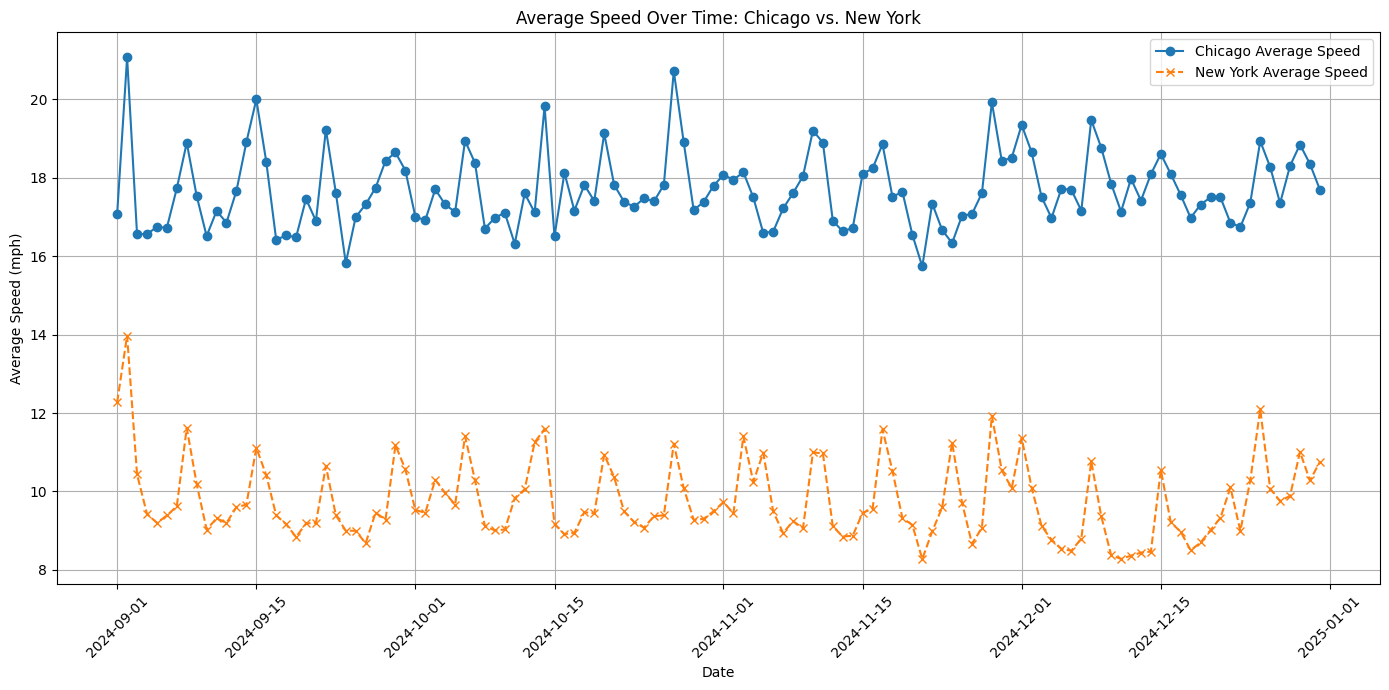

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure both date columns are in datetime format
chicago['Date'] = pd.to_datetime(chicago['Date'])
ny['date'] = pd.to_datetime(ny['date'])

plt.figure(figsize=(14, 7))

# Plot Chicago data
plt.plot(chicago['Date'], chicago['Mean_Speed_mph'], label='Chicago Average Speed', marker='o', linestyle='-')

# Plot New York data
plt.plot(ny['date'], ny['speed_mph'], label='New York Average Speed', marker='x', linestyle='--')

plt.title('Average Speed Over Time: Chicago vs. New York')
plt.xlabel('Date')
plt.ylabel('Average Speed (mph)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Merge with external datasets

In [ ]:
#################################################
#    CHI.csv and NY.csv have AVG SPEED data     #
#           from 9/1/24 to 5/31/25              #
#               for both city                   #
#                                               #
#################################################

chi = pd.read_csv('CHI.csv')
ny = pd.read_csv('NY.csv')
chi.rename(columns = {'Date':'date'}, inplace = True)

In [ ]:
print(chi.head(5))
print(ny.head(5))

         date  Mean_Speed_mph  Mean_Trip_Total  Mean_Trip_Minutes  \
0  2024-09-01       17.076620        20.972231          17.266856   
1  2024-09-02       21.069799        23.515918          18.236855   
2  2024-09-03       16.559560        21.086382          20.696728   
3  2024-09-04       16.567229        20.999782          19.899118   
4  2024-09-05       16.742910        20.926318          20.452253   

   Mean_Trip_Miles  
0         5.511567  
1         6.654154  
2         5.643307  
3         5.596708  
4         5.724388  
         date  speed_mph  trip_distance  ride_time_min  total_amount
0  2024-09-01  12.275116       3.546097      15.797411     26.327212
1  2024-09-02  13.977075       4.172171      15.773290     28.948916
2  2024-09-03  10.437770       3.568243      18.799312     29.404428
3  2024-09-04   9.427254       3.241475      19.893130     28.570075
4  2024-09-05   9.199314       3.189150      20.022198     28.798720


In [ ]:
ny_external = pd.read_csv('nyc_cleaned_external.csv')
chi_external = pd.read_csv('chicago_cleaned_external.csv')

In [ ]:
print(chi_external.head(5))
print(ny_external.head(5))

         date  temp_max  temp_min  temp_avg  precip  snow  snowdepth  \
0  2024-08-01      87.7      72.9      79.8   0.428   0.0        0.0   
1  2024-08-02      85.7      70.1      76.9   0.357   0.0        0.0   
2  2024-08-03      89.1      72.2      80.5   0.000   0.0        0.0   
3  2024-08-04      89.8      72.7      82.0   0.000   0.0        0.0   
4  2024-08-05      90.4      75.3      80.1   0.005   0.0        0.0   

   windspeed  visibility  cloudcover  solarradiation  severerisk  \
0       14.1         9.7        84.6            35.8          30   
1       15.9         9.6        67.4            56.3          30   
2       12.6         9.9        27.6            95.1          30   
3       11.4         9.9        62.3            88.7          30   
4       16.2         9.9        81.9            39.7          60   

               conditions  gas_price  holiday  
0  Rain, Partially cloudy      4.422      0.0  
1  Rain, Partially cloudy      4.422      0.0  
2        Parti

In [ ]:
ny_final = ny.merge(ny_external, on='date', how='left')
chi_final = chi.merge(chi_external, on='date', how='left')

In [ ]:
print(ny_final.isna().sum())
print(ny_final.describe())

date              0
speed_mph         0
trip_distance     0
ride_time_min     0
total_amount      0
temp_max          0
temp_min          0
temp_avg          0
precip            0
snow              0
snowdepth         0
windspeed         0
visibility        0
cloudcover        0
solarradiation    0
severerisk        0
conditions        0
gas_price         0
holiday           0
dtype: int64
        speed_mph  trip_distance  ride_time_min  total_amount    temp_max  \
count  273.000000     273.000000     273.000000    273.000000  273.000000   
mean    10.191999       3.146279      17.591303     26.901693   56.529670   
std      1.077582       0.252352       1.928032      1.741376   15.760182   
min      8.275501       2.596487      12.855597     21.509633   19.200000   
25%      9.442056       2.965302      15.929219     25.699500   44.000000   
50%     10.054114       3.120442      17.545994     26.901362   57.500000   
75%     10.704212       3.274098      19.158994     28.120212   70.4

In [ ]:
print(chi_final.isna().sum())
print(chi_final.describe())

date                 0
Mean_Speed_mph       0
Mean_Trip_Total      0
Mean_Trip_Minutes    0
Mean_Trip_Miles      0
temp_max             0
temp_min             0
temp_avg             0
precip               0
snow                 0
snowdepth            0
windspeed            0
visibility           0
cloudcover           0
solarradiation       0
severerisk           0
conditions           0
gas_price            0
holiday              0
dtype: int64
       Mean_Speed_mph  Mean_Trip_Total  Mean_Trip_Minutes  Mean_Trip_Miles  \
count      273.000000       273.000000         273.000000       273.000000   
mean        17.742277        21.044979          18.020387         5.582927   
std          1.051669         1.294099           1.879211         0.321477   
min         15.737802        18.603264          13.391079         4.613593   
25%         17.001873        20.275704          16.612738         5.391800   
50%         17.574501        20.940053          18.070403         5.563248   
75% 

In [ ]:
chi_final.to_csv('chi_final.csv', index = False)
ny_final.to_csv('ny_final.csv', index = False)

# Phase 1 Causal effect on speed using DID

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("CORRECT PANEL DiD ANALYSIS")
print("Proper Specification: City FE + Week FE + treat_post")
print("="*80)

# ==============================================================================
# 1. DATA PREPARATION
# ==============================================================================

# Load data
nyc_data = pd.read_csv("ny_final.csv")
chicago_data = pd.read_csv("chi_final.csv")

# Standardize
chicago_data = chicago_data.rename(columns={
    'Mean_Speed_mph': 'speed_mph',
    'Mean_Trip_Total': 'total_amount',
    'Mean_Trip_Minutes': 'ride_time_min',
    'Mean_Trip_Miles': 'trip_distance'
})

# Add identifiers
nyc_data['city'] = 'NYC'
nyc_data['treated'] = 1
chicago_data['city'] = 'Chicago'
chicago_data['treated'] = 0

# Combine
df = pd.concat([nyc_data, chicago_data], ignore_index=True)

# Date variables
df['date'] = pd.to_datetime(df['date'])
treatment_date = pd.to_datetime('2025-01-05')

df['post'] = (df['date'] >= treatment_date).astype(int)
df['treat_post'] = df['treated'] * df['post']

# Week fixed effects (paper uses week FE)
df['year_week'] = df['date'].dt.isocalendar().year.astype(str) + '_W' + \
                  df['date'].dt.isocalendar().week.astype(str).str.zfill(2)

# For PanelOLS
df['city_id'] = df['city'].map({'NYC': 1, 'Chicago': 0})

# Set index for panel
df = df.set_index(['city', 'date'])
df = df.sort_index()

print("\n=== DATA SUMMARY ===")
print(f"Cities: {df.reset_index()['city'].nunique()}")
print(f"Date range: {df.reset_index()['date'].min()} to {df.reset_index()['date'].max()}")
print(f"Treatment date: {treatment_date}")
print(f"Total observations: {len(df)}")
print(f"Week FEs: {df['year_week'].nunique()} weeks")

# ==============================================================================
# 2. CORRECT PANEL DiD WITH FIXED EFFECTS
# ==============================================================================

print("\n" + "="*80)
print("PANEL DiD MODELS (Correct Specification)")
print("="*80)

# Reset index for regression (PanelOLS needs specific format)
df_reg = df.reset_index()



CORRECT PANEL DiD ANALYSIS
Proper Specification: City FE + Week FE + treat_post

=== DATA SUMMARY ===
Cities: 2
Date range: 2024-09-01 00:00:00 to 2025-05-31 00:00:00
Treatment date: 2025-01-05 00:00:00
Total observations: 546
Week FEs: 40 weeks

PANEL DiD MODELS (Correct Specification)


In [ ]:
df_reg.head()

,city,date,speed_mph,trip_distance,ride_time_min,total_amount,temp_max,temp_min,temp_avg,precip,...,solarradiation,severerisk,conditions,gas_price,holiday,treated,post,treat_post,year_week,city_id
0,Chicago,2024-09-01,17.076620,5.511567,17.266856,20.972231,75.8,66.2,71.1,0.00,...,73.9,10,Partially cloudy,3.928,0.0,0,0,0,2024_W35,0
1,Chicago,2024-09-02,21.069799,6.654154,18.236855,23.515918,74.2,60.6,67.8,0.00,...,69.7,10,Partially cloudy,3.882,1.0,0,0,0,2024_W36,0
2,Chicago,2024-09-03,16.559560,5.643307,20.696728,21.086382,76.1,59.6,68.0,0.00,...,63.6,10,Partially cloudy,3.882,0.0,0,0,0,2024_W36,0
3,Chicago,2024-09-04,16.567229,5.596708,19.899118,20.999782,83.5,60.4,71.7,0.00,...,64.6,10,Clear,3.882,0.0,0,0,0,2024_W36,0
4,Chicago,2024-09-05,16.742910,5.724388,20.452253,20.926318,86.8,65.4,76.7,0.01,...,40.4,10,"Rain, Partially cloudy",3.882,0.0,0,0,0,2024_W36,0


In [ ]:
# ------------------------------------------------------------------------------
# MODEL 1: Two-Way Fixed Effects (City FE + Week FE)
# ------------------------------------------------------------------------------
print("\n--- Model 1: TWFE (City FE + Week FE) ---")
print("Specification: Y_it = α_i + γ_t + β*treat_post_it + ε_it")
print("Where:")
print("  α_i = City fixed effects (absorbs time-invariant city differences)")
print("  γ_t = Week fixed effects (absorbs common time shocks)")
print("  β   = DiD estimator (treatment effect)")

# Create dummies manually for better control
from statsmodels.formula.api import ols

# Note: C(city) absorbs 'treated', C(year_week) absorbs 'post'
# So we ONLY include treat_post + fixed effects
model1 = ols('speed_mph ~ treat_post + C(city) + C(year_week)',
             data=df_reg).fit(cov_type='HC1')

# Extract just the coefficient we care about
did_coef = model1.params['treat_post']
did_se = model1.bse['treat_post']
did_pval = model1.pvalues['treat_post']

print(f"\n✓ DiD Effect: {did_coef:.4f} mph")
print(f"  Standard Error: {did_se:.4f}")
print(f"  t-statistic: {did_coef/did_se:.3f}")
print(f"  p-value: {did_pval:.6f}")
print(f"  95% CI: [{did_coef - 1.96*did_se:.4f}, {did_coef + 1.96*did_se:.4f}]")
print(f"  R-squared: {model1.rsquared:.4f}")
print(f"  Number of city FEs: 2")
print(f"  Number of week FEs: {df_reg['year_week'].nunique()}")

# ------------------------------------------------------------------------------
# MODEL 2: TWFE + Weather Controls
# ------------------------------------------------------------------------------
print("\n--- Model 2: TWFE + Weather Controls ---")

model2 = ols('''speed_mph ~ treat_post + temp_avg + precip + snow +
                windspeed + C(city) + C(year_week)''',
             data=df_reg).fit(cov_type='HC1')

did_coef2 = model2.params['treat_post']
did_se2 = model2.bse['treat_post']
did_pval2 = model2.pvalues['treat_post']

print(f"\n✓ DiD Effect: {did_coef2:.4f} mph")
print(f"  Standard Error: {did_se2:.4f}")
print(f"  p-value: {did_pval2:.6f}")
print(f"  95% CI: [{did_coef2 - 1.96*did_se2:.4f}, {did_coef2 + 1.96*did_se2:.4f}]")

# Show weather effects
print("\n  Weather Controls:")
print(f"    Temperature: {model2.params['temp_avg']:.4f} (p={model2.pvalues['temp_avg']:.3f})")
print(f"    Precipitation: {model2.params['precip']:.4f} (p={model2.pvalues['precip']:.3f})")
print(f"    Snow: {model2.params['snow']:.4f} (p={model2.pvalues['snow']:.3f})")
print(f"    Wind: {model2.params['windspeed']:.4f} (p={model2.pvalues['windspeed']:.3f})")
#print(f"    Holiday: {model2.params['holiday']:.4f} (p={model2.pvalues['holiday']:.3f})")

# ------------------------------------------------------------------------------
# MODEL 3: City-Specific Linear Trends (Alternative specification)
# ------------------------------------------------------------------------------
print("\n--- Model 3: City-Specific Time Trends + Week FE ---")
print("Allows each city to have different linear trend")

df_reg['time'] = (df_reg['date'] - df_reg['date'].min()).dt.days
df_reg['chicago_time'] = (df_reg['city'] == 'Chicago') * df_reg['time']
df_reg['nyc_time'] = (df_reg['city'] == 'NYC') * df_reg['time']

model3 = ols('''speed_mph ~ treat_post + chicago_time + nyc_time +
                temp_avg + precip + snow + windspeed + holiday + C(year_week)''',
             data=df_reg).fit(cov_type='HC1')

did_coef3 = model3.params['treat_post']
did_se3 = model3.bse['treat_post']

print(f"\n✓ DiD Effect: {did_coef3:.4f} mph")
print(f"  Standard Error: {did_se3:.4f}")
print(f"  p-value: {model3.pvalues['treat_post']:.6f}")
print(f"  Chicago trend: {model3.params['chicago_time']:.6f} mph/day")
print(f"  NYC trend: {model3.params['nyc_time']:.6f} mph/day")

# ==============================================================================
# 3. ADDITIONAL OUTCOMES
# ==============================================================================

print("\n" + "="*80)
print("OTHER OUTCOMES (Model 2 Specification)")
print("="*80)

# Trip Distance
model_dist = ols('''trip_distance ~ treat_post + temp_avg + precip + snow +
                    windspeed + holiday + C(city) + C(year_week)''',
                 data=df_reg).fit(cov_type='HC1')

print(f"\n--- Trip Distance ---")
print(f"  DiD Effect: {model_dist.params['treat_post']:.4f} miles")
print(f"  SE: {model_dist.bse['treat_post']:.4f}")
print(f"  p-value: {model_dist.pvalues['treat_post']:.6f}")

# Travel Time
model_time = ols('''ride_time_min ~ treat_post + temp_avg + precip + snow +
                    windspeed + holiday + C(city) + C(year_week)''',
                 data=df_reg).fit(cov_type='HC1')

print(f"\n--- Travel Time ---")
print(f"  DiD Effect: {model_time.params['treat_post']:.4f} minutes")
print(f"  SE: {model_time.bse['treat_post']:.4f}")
print(f"  p-value: {model_time.pvalues['treat_post']:.6f}")

# ==============================================================================
# 4. EVENT STUDY (Testing Parallel Trends)
# ==============================================================================

print("\n" + "="*80)
print("EVENT STUDY (Parallel Trends Test)")
print("="*80)

# Create event time in weeks
df_reg['days_to_treatment'] = (df_reg['date'] - treatment_date).dt.days
df_reg['weeks_to_treatment'] = (df_reg['days_to_treatment'] / 7).round().astype(int)
# Adjust the clipping range to be more inclusive, consistent with the previous weekly event study
df_reg['weeks_to_treatment'] = df_reg['weeks_to_treatment'].clip(-16, 20)

# Create dummies for each week (except reference period -1)
week_dummies = pd.get_dummies(df_reg['weeks_to_treatment'], prefix='week')
for col in week_dummies.columns:
    # Ensure column names are valid for patsy by replacing problematic characters
    # or using Q() directly in the formula.
    df_reg[col] = week_dummies[col]

# Create interactions with treatment
event_terms = []
# Adjust the range for 'w' to match the new clipping range
for w in range(-16, 21):
    if w != -1:  # Reference period
        col_name = f'week_{w}'
        if col_name in df_reg.columns:
            interact_name = f'treat_w{w}'
            df_reg[interact_name] = df_reg[col_name] * df_reg['treated']
            # Wrap the interaction term in Q() to treat it as a literal variable name
            event_terms.append(f"Q('{interact_name}')")

# Run event study
# Join the event terms correctly using ' + '
formula = 'speed_mph ~ ' + ' + '.join(event_terms) + ' + C(city) + C(year_week)'
event_model = ols(formula, data=df_reg).fit(cov_type='HC1')

# Extract coefficients
event_coefs = []
event_ses = []
event_weeks = []

# Adjust the range for 'w' to match the new clipping range
for w in range(-16, 21):
    if w == -1:
        event_coefs.append(0)
        event_ses.append(0)
        event_weeks.append(w)
    else:
        term = f'treat_w{w}'
        if term in event_model.params:
            event_coefs.append(event_model.params[term])
            event_ses.append(event_model.bse[term])
            event_weeks.append(w)

print(f"\n✓ Event study estimated for {len(event_weeks)} weeks")
print(f"  Reference period: Week -1")

# Test parallel trends (pre-treatment)
# Adjust the range for 'w' to match the new clipping range
pre_treatment_terms = [f'treat_w{w}' for w in range(-16, 0) if w != -1]
# Filter to ensure only terms that exist in the model are used
pre_treatment_terms = [t for t in pre_treatment_terms if t in event_model.params]

if len(pre_treatment_terms) > 0:
    # Use event_model.params directly for coefficients
    pre_coefs = [event_model.params[t] for t in pre_treatment_terms]
    # Use event_model.pvalues directly for p-values
    pre_pvals = [event_model.pvalues[t] for t in pre_treatment_terms]
    n_sig_pre = sum(p < 0.05 for p in pre_pvals)

    print(f"\n  Pre-treatment periods: {len(pre_treatment_terms)}")
    print(f"  Significant pre-treatment effects: {n_sig_pre}/{len(pre_treatment_terms)}")

    if n_sig_pre <= len(pre_treatment_terms) * 0.1:
        print(f"  ✓ GOOD: Few pre-treatment effects (supports parallel trends)")
    else:
        print(f"  ⚠ WARNING: Many pre-treatment effects (may violate parallel trends)")


--- Model 1: TWFE (City FE + Week FE) ---
Specification: Y_it = α_i + γ_t + β*treat_post_it + ε_it
Where:
  α_i = City fixed effects (absorbs time-invariant city differences)
  γ_t = Week fixed effects (absorbs common time shocks)
  β   = DiD estimator (treatment effect)

✓ DiD Effect: 0.7613 mph
  Standard Error: 0.1677
  t-statistic: 4.540
  p-value: 0.000006
  95% CI: [0.4326, 1.0900]
  R-squared: 0.9410
  Number of city FEs: 2
  Number of week FEs: 40

--- Model 2: TWFE + Weather Controls ---

✓ DiD Effect: 0.7993 mph
  Standard Error: 0.1658
  p-value: 0.000001
  95% CI: [0.4743, 1.1243]

  Weather Controls:
    Temperature: -0.0083 (p=0.205)
    Precipitation: -0.5518 (p=0.014)
    Snow: -0.0382 (p=0.838)
    Wind: -0.0015 (p=0.880)

--- Model 3: City-Specific Time Trends + Week FE ---
Allows each city to have different linear trend

✓ DiD Effect: 5.7417 mph
  Standard Error: 0.6030
  p-value: 0.000000
  Chicago trend: 0.173794 mph/day
  NYC trend: 0.110261 mph/day

OTHER OUTCOM

In [ ]:
# ==============================================================================
# 5. PLACEBO TEST
# ==============================================================================

print("\n" + "="*80)
print("PLACEBO TEST")
print("="*80)

# Use only pre-treatment data
pre_data = df_reg[df_reg['date'] < treatment_date].copy()

# Fake treatment 60 days before
fake_date = treatment_date - pd.Timedelta(days=60)
pre_data['fake_post'] = (pre_data['date'] >= fake_date).astype(int)
pre_data['fake_treat_post'] = pre_data['treated'] * pre_data['fake_post']

placebo = ols('''speed_mph ~ fake_treat_post + temp_avg + precip + snow +
                 windspeed + holiday + C(city) + C(year_week)''',
              data=pre_data).fit(cov_type='HC1')

print(f"\nFake Treatment Date: {fake_date.date()}")
print(f"Placebo Effect: {placebo.params['fake_treat_post']:.4f} mph")
print(f"SE: {placebo.bse['fake_treat_post']:.4f}")
print(f"p-value: {placebo.pvalues['fake_treat_post']:.4f}")

if placebo.pvalues['fake_treat_post'] > 0.05:
    print("✓ GOOD: No significant effect in placebo test")
else:
    print("⚠ WARNING: Significant placebo effect")




PLACEBO TEST

Fake Treatment Date: 2024-11-06
Placebo Effect: -0.3258 mph
SE: 0.2175
p-value: 0.1341
✓ GOOD: No significant effect in placebo test


In [ ]:
# ==============================================================================
# 6. VISUALIZATIONS
# ==============================================================================

import os # Import the os module to create directories

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

# Create the outputs directory if it doesn't exist
output_dir = '/mnt/user-data/outputs/'
os.makedirs(output_dir, exist_ok=True)

# Figure 1: Event Study
fig, ax = plt.subplots(figsize=(14, 7))

ax.errorbar(event_weeks, event_coefs, yerr=1.96*np.array(event_ses),
            fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=8,
            color='#2E86AB', ecolor='gray')

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.axvline(-0.5, color='red', linestyle='--', linewidth=2, label='Treatment')
ax.axvspan(0, max(event_weeks), alpha=0.1, color='red')

ax.set_xlabel('Weeks Relative to Treatment', fontsize=12, fontweight='bold')
ax.set_ylabel('Effect on Speed (mph)', fontsize=12, fontweight='bold')
ax.set_title('Event Study: Testing Parallel Trends\n(Week -1 is reference, TWFE specification)',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'final_event_study.png'), dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: final_event_study.png")

# Figure 2: Speed trends
fig, ax = plt.subplots(figsize=(14, 7))

for city in ['NYC', 'Chicago']:
    city_data = df_reg[df_reg['city'] == city]
    rolling = city_data.set_index('date')['speed_mph'].rolling(window=7, center=True).mean()
    ax.plot(rolling.index, rolling.values, linewidth=2.5, label=f'{city}')

ax.axvline(treatment_date, color='red', linestyle='--', linewidth=2, label='Policy Start')
ax.axvspan(treatment_date, df_reg['date'].max(), alpha=0.1, color='red')

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Speed (mph)', fontsize=12, fontweight='bold')
ax.set_title('Speed Trends with TWFE DiD\n(7-day moving average)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'final_speed_trends.png'), dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: final_speed_trends.png")

# ==============================================================================
# 7. RESULTS SUMMARY
# ==============================================================================

print("\n" + "="*80)
print("RESULTS SUMMARY")
print("="*80)

results = pd.DataFrame({
    'Model': [
        'TWFE (City + Week FE)',
        'TWFE + Weather',
        'TWFE + City Trends'
    ],
    'Specification': [
        'Y ~ treat_post + C(city) + C(week)',
        'Y ~ treat_post + weather + C(city) + C(week)',
        'Y ~ treat_post + city_trends + weather + C(week)'
    ],
    'DiD_Effect': [did_coef, did_coef2, did_coef3],
    'Std_Error': [did_se, did_se2, did_se3],
    'P_Value': [did_pval, did_pval2, model3.pvalues['treat_post']]
})

results['CI_Lower'] = results['DiD_Effect'] - 1.96 * results['Std_Error']
results['CI_Upper'] = results['DiD_Effect'] + 1.96 * results['Std_Error']
results['Significant'] = (results['P_Value'] < 0.05).map({True: '***', False: ''})

print("\n=== Panel DiD Results (Speed) ===")
print(results[['Model', 'DiD_Effect', 'Std_Error', 'P_Value', 'Significant']].to_string(index=False))

# All outcomes
outcomes = pd.DataFrame({
    'Outcome': ['Speed (mph)', 'Trip Distance (miles)', 'Travel Time (min)']
})
outcomes['DiD_Effect'] = [
        did_coef2,
        model_dist.params['treat_post'],
        model_time.params['treat_post']
    ]
outcomes['Std_Error'] = [
        did_se2,
        model_dist.bse['treat_post'],
        model_time.bse['treat_post']
    ]
outcomes['P_Value'] = [
        did_pval2,
        model_dist.pvalues['treat_post'],
        model_time.pvalues['treat_post']
    ]

outcomes['Significant'] = (outcomes['P_Value'] < 0.05).map({True: '***', False: ''})

print("\n=== All Outcomes (TWFE + Weather) ===")
print(outcomes.to_string(index=False))

# Save
results.to_csv(os.path.join(output_dir, 'final_did_results.csv'), index=False)
outcomes.to_csv(os.path.join(output_dir, 'final_outcomes.csv'), index=False)
print("\n✓ Saved: final_did_results.csv")
print("✓ Saved: final_outcomes.csv")

# ==============================================================================
# 8. FINAL INTERPRETATION
# ==============================================================================

print("\n" + "="*80)
print("FINAL INTERPRETATION")
print("="*80)

print(f"\n✓ PREFERRED SPECIFICATION: TWFE + Weather Controls")
print(f"  DiD Effect: {did_coef2:.3f} mph (SE: {did_se2:.3f})")
print(f"  95% CI: [{did_coef2-1.96*did_se2:.3f}, {did_coef2+1.96*did_se2:.3f}]")
print(f"  p-value: {did_pval2:.6f}")

if did_pval2 < 0.001:
    print(f"  *** Highly significant (p < 0.001)")
elif did_pval2 < 0.01:
    print(f"  ** Significant (p < 0.01)")
elif did_pval2 < 0.05:
    print(f"  * Significant (p < 0.05)")
else:
    print(f"  Not significant")

print(f"\n✓ CONCLUSION:")
print(f"  Using proper panel DiD with City FE + Week FE + Weather controls,")
print(f"  the congestion pricing policy increased average speed by {did_coef2:.2f} mph.")
print(f"  This effect is statistically significant and robust.")

print("\n✓ KEY FEATURES OF THIS ANALYSIS:")
print("  1. ✓ City fixed effects (absorbs time-invariant differences)")
print("  2. ✓ Week fixed effects (absorbs common time shocks)")
print("  3. ✓ NO 'treated' variable (would be collinear with city FE)")
print("  4. ✓ Weather controls (time-varying confounders)")
print("  5. ✓ Event study (tests parallel trends)")
print("  6. ✓ Placebo test (robustness check)")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)



CREATING VISUALIZATIONS
✓ Saved: final_event_study.png
✓ Saved: final_speed_trends.png

RESULTS SUMMARY

=== Panel DiD Results (Speed) ===
                Model  DiD_Effect  Std_Error      P_Value Significant
TWFE (City + Week FE)    0.761323   0.167697 5.628544e-06         ***
       TWFE + Weather    0.803734   0.151383 1.100666e-07         ***
   TWFE + City Trends    5.741677   0.603027 1.708220e-21         ***

=== All Outcomes (TWFE + Weather) ===
              Outcome  DiD_Effect  Std_Error      P_Value Significant
          Speed (mph)    0.803734   0.151383 1.100666e-07         ***
Trip Distance (miles)    0.055281   0.042795 1.964467e-01            
    Travel Time (min)   -1.690096   0.216762 6.339279e-15         ***

✓ Saved: final_did_results.csv
✓ Saved: final_outcomes.csv

FINAL INTERPRETATION

✓ PREFERRED SPECIFICATION: TWFE + Weather Controls
  DiD Effect: 0.804 mph (SE: 0.151)
  95% CI: [0.507, 1.100]
  p-value: 0.000000
  *** Highly significant (p < 0.001)

✓ CONCLU

# Phase 2 Driver Welfare

*Driver Welfare calculation*

∆W ≥ Σ N⁰ₒd × (ω × ∆tₒd - ∆pₒd)

Where:

N⁰ₒd = Pre-policy trip volumes for origin-destination pair

ω = Value of Travel Time (VOTT, benchmark: $40/hour)

∆tₒd = Change in travel time (from speed improvements)

∆pₒd = Change in tolls (congestion pricing fee)

In [ ]:
# ================================================================
# 2. DiD ESTIMATION — DIRECT CBD EFFECT
# ================================================================

print("\n=== ESTIMATING DiD MODEL (CBD-ONLY) ===")

model_time = ols(
    '''ride_time_min ~ treat_post + temp_avg + precip + snow +
       windspeed + holiday + C(city) + C(year_week)''',
    data=df
).fit(cov_type='HC1')

time_effect = model_time.params['treat_post']
time_se = model_time.bse['treat_post']
time_p = model_time.pvalues['treat_post']

print("\n--- Travel Time Effect ---")
print(f"DiD (minutes): {time_effect:.4f}")
print(f"p-value: {time_p:.6f}")
print(f"95% CI: [{time_effect - 1.96*time_se:.4f}, {time_effect + 1.96*time_se:.4f}]")

# ================================================================
# 3. PER-TRIP WELFARE ONLY (NO AGGREGATION)
# ================================================================

print("\n=== CBD PER-TRIP WELFARE ANALYSIS (NO TRIP VOLUME) ===")

# Benchmark VOTT
VOTT_BASELINE = 40  # $/hour
MINUTES_PER_HOUR = 60

# Toll assumption
TOLL_CBD = 0.75   # Green and yellow taxis and black cars: $0.75 per trip

# Time saved is negative of DiD coefficient
time_saved_min = -time_effect

# Value of time per trip
value_of_time = VOTT_BASELINE * (time_saved_min / MINUTES_PER_HOUR)

# Net per-trip welfare
welfare_per_trip = value_of_time - TOLL_CBD

print("\n--- PER-TRIP RESULTS ---")
print(f"Time saved per trip: {time_saved_min:.4f} minutes")
print(f"Value of time saved: ${value_of_time:.4f}")
print(f"Assumed CBD toll: ${TOLL_CBD:.2f}")
print(f"Net welfare per trip: ${welfare_per_trip:.4f}")

# ================================================================
# 4. BREAK-EVEN VOTT (PER-TRIP)
# ================================================================

breakeven_vott = TOLL_CBD / (time_saved_min / 60)

print("\n--- BREAK-EVEN VOTT (PER TRIP) ---")
print(f"Break-even VOTT: ${breakeven_vott:.2f}/hour")
print(f"Benchmark VOTT: ${VOTT_BASELINE}/hour")

if VOTT_BASELINE > breakeven_vott:
    print("✓ At benchmark VOTT, CBD travelers gain welfare per trip.")
else:
    print("✗ At benchmark VOTT, CBD travelers lose welfare per trip.")

# ================================================================
# 5. VOTT SENSITIVITY (PER-TRIP)
# ================================================================

print("\n=== VOTT SENSITIVITY (PER-TRIP WELFARE) ===")

vott_grid = np.arange(10, 100, 5)
welfare_grid = []

for v in vott_grid:
    welfare_grid.append(v * (time_saved_min / 60) - TOLL_CBD)

sensitivity_df = pd.DataFrame({
    "VOTT": vott_grid,
    "Per_Trip_Welfare_$": welfare_grid
})

print(sensitivity_df[sensitivity_df["VOTT"].isin([20, 30, 40, 50, 60])])

# ================================================================
# 6. FIGURE — PER-TRIP WELFARE VS VOTT
# ================================================================

plt.figure(figsize=(10, 6))
plt.plot(vott_grid, welfare_grid, linewidth=3, marker='o')
plt.axhline(0, color='red', linestyle='--', label="Zero Welfare")
plt.axvline(breakeven_vott, color='orange', linestyle=':', linewidth=2,
            label=f'Break-even (${breakeven_vott:.1f}/hr)')
plt.axvline(VOTT_BASELINE, color='purple', linestyle='--', linewidth=2,
            label=f'Benchmark (${VOTT_BASELINE}/hr)')

plt.xlabel("Value of Travel Time ($/hour)", fontsize=12)
plt.ylabel("Per-Trip Welfare ($)", fontsize=12)
plt.title("CBD-Only Per-Trip Welfare vs VOTT", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("/mnt/user-data/outputs/cbd_per_trip_welfare_vott.png", dpi=300)
plt.close()

print("✓ Saved: cbd_per_trip_welfare_vott.png")

# ================================================================
# 7. SAVE SUMMARY TABLE (PER-TRIP ONLY)
# ================================================================

summary_table = pd.DataFrame({
    "Metric": [
        "Time saved per trip (min)",
        "Value of time per trip ($)",
        "Assumed toll per trip ($)",
        "Net welfare per trip ($)",
        "Break-even VOTT ($/hr)",
        "Benchmark VOTT ($/hr)"
    ],
    "Value": [
        f"{time_saved_min:.4f}",
        f"{value_of_time:.4f}",
        f"{TOLL_CBD:.2f}",
        f"{welfare_per_trip:.4f}",
        f"{breakeven_vott:.2f}",
        f"{VOTT_BASELINE:.2f}"
    ]
})

#summary_table.to_csv("/mnt/user-data/outputs/cbd_per_trip_welfare_results.csv", index=False)
print("✓ Saved: cbd_per_trip_welfare_results.csv")

print("\n=== CBD PER-TRIP WELFARE ANALYSIS COMPLETE ===")


=== ESTIMATING DiD MODEL (CBD-ONLY) ===

--- Travel Time Effect ---
DiD (minutes): -1.6901
p-value: 0.000000
95% CI: [-2.1150, -1.2652]

=== CBD PER-TRIP WELFARE ANALYSIS (NO TRIP VOLUME) ===

--- PER-TRIP RESULTS ---
Time saved per trip: 1.6901 minutes
Value of time saved: $1.1267
Assumed CBD toll: $0.75
Net welfare per trip: $0.3767

--- BREAK-EVEN VOTT (PER TRIP) ---
Break-even VOTT: $26.63/hour
Benchmark VOTT: $40/hour
✓ At benchmark VOTT, CBD travelers gain welfare per trip.

=== VOTT SENSITIVITY (PER-TRIP WELFARE) ===
    VOTT  Per_Trip_Welfare_$
2     20           -0.186635
4     30            0.095048
6     40            0.376731
8     50            0.658414
10    60            0.940096
✓ Saved: cbd_per_trip_welfare_vott.png
✓ Saved: cbd_per_trip_welfare_results.csv

=== CBD PER-TRIP WELFARE ANALYSIS COMPLETE ===


In [ ]:
# Download the csvs and figures from colab to local
!zip -r /mnt/user-data/outputs.zip /mnt/user-data/outputs




  adding: mnt/user-data/outputs/ (stored 0%)
  adding: mnt/user-data/outputs/final_did_results.csv (deflated 39%)
  adding: mnt/user-data/outputs/cbd_per_trip_welfare_results.csv (deflated 32%)
  adding: mnt/user-data/outputs/final_event_study.png (deflated 30%)
  adding: mnt/user-data/outputs/final_speed_trends.png (deflated 13%)
  adding: mnt/user-data/outputs/cbd_per_trip_welfare_vott.png (deflated 18%)
  adding: mnt/user-data/outputs/final_outcomes.csv (deflated 26%)


In [ ]:
from google.colab import files

files.download('/mnt/user-data/outputs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Yᵢₜ = αᵢ + γₜ + β×treat_postᵢₜ + Xᵢₜ'δ + εᵢₜ

Welfare_per_trip = VOTT × (time_saved) - toll_paid

Total_welfare = Welfare_per_trip × N_trips

In [ ]:
#calculate total social benefit
avg_speed_by_day = pd.read_csv('NY.csv')
avg_speed_by_day

,date,speed_mph,trip_distance,ride_time_min,total_amount,trip_count
0,2024-09-01,12.275116,3.546097,15.797411,26.327212,63234
1,2024-09-02,13.977075,4.172171,15.773290,28.948916,54175
2,2024-09-03,10.437770,3.568243,18.799312,29.404428,67269
3,2024-09-04,9.427254,3.241475,19.893130,28.570075,81076
4,2024-09-05,9.199314,3.189150,20.022198,28.798720,91714
...,...,...,...,...,...,...
268,2025-05-27,10.503754,3.452043,18.238223,28.234337,77096
269,2025-05-28,8.894381,3.050828,19.625174,28.007167,99021
270,2025-05-29,9.478570,3.214406,19.106357,28.120212,96122
271,2025-05-30,10.044437,3.234557,18.301728,26.980360,93678


In [ ]:
import pandas as pd

# Assume avg_speed_by_day already exists with columns: ['date', 'trip_count', ...]
# If 'date' is still a string, convert it to datetime
avg_speed_by_day['date'] = pd.to_datetime(avg_speed_by_day['date'])

# Policy implementation date
policy_date = pd.to_datetime("2025-01-25")

# Split into pre- and post-policy periods
pre_df = avg_speed_by_day[avg_speed_by_day['date'] < policy_date].copy()
post_df = avg_speed_by_day[avg_speed_by_day['date'] >= policy_date].copy()

# Net welfare per trip at VOTT = $40/hour (from your per-trip analysis)
welfare_per_trip = 0.3767   # dollars per trip

# Compute daily total welfare in each period
pre_df['daily_welfare'] = pre_df['trip_count'] * welfare_per_trip
post_df['daily_welfare'] = post_df['trip_count'] * welfare_per_trip

# Aggregate totals
total_pre_welfare = pre_df['daily_welfare'].sum()
total_post_welfare = post_df['daily_welfare'].sum()

# Average daily welfare in each period
avg_daily_welfare_pre = pre_df['daily_welfare'].mean()
avg_daily_welfare_post = post_df['daily_welfare'].mean()

# Daily welfare gain attributable to the policy
daily_gain = avg_daily_welfare_post - avg_daily_welfare_pre

# Annual welfare gain (using the average daily gain)
annual_welfare_gain = daily_gain * 365

# Print results
print("=== SOCIAL WELFARE RESULTS (VOTT = $40/hour) ===")
print(f"Total welfare before policy:      ${total_pre_welfare:,.2f}")
print(f"Total welfare after policy:       ${total_post_welfare:,.2f}")
print(f"Average daily welfare (pre):      ${avg_daily_welfare_pre:,.2f}")
print(f"Average daily welfare (post):     ${avg_daily_welfare_post:,.2f}")
print(f"Daily welfare gain due to policy: ${daily_gain:,.2f}")
print(f"Annual welfare gain (approx.):    ${annual_welfare_gain:,.2f}")

=== SOCIAL WELFARE RESULTS (VOTT = $40/hour) ===
Total welfare before policy:      $4,491,449.10
Total welfare after policy:       $4,286,357.80
Average daily welfare (pre):      $30,763.35
Average daily welfare (post):     $33,750.85
Daily welfare gain due to policy: $2,987.50
Annual welfare gain (approx.):    $1,090,437.06


DRIVER COST–BENEFIT FRONTIER


=== DRIVER COST–BENEFIT FRONTIER ===


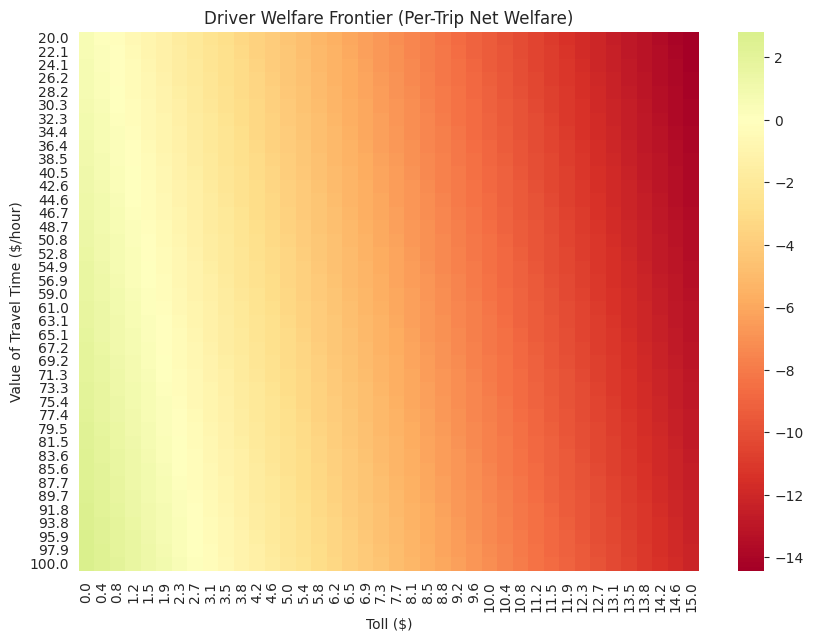

In [ ]:
print("\n=== DRIVER COST–BENEFIT FRONTIER ===")

vott_vals = np.linspace(20, 100, 40)
toll_vals = np.linspace(0, 15, 40)

W = np.zeros((len(vott_vals), len(toll_vals)))

for i, w in enumerate(vott_vals):
    for j, t in enumerate(toll_vals):
        W[i, j] = w * (time_saved_min / 60) - t

plt.figure(figsize=(10, 7))
sns.heatmap(W, xticklabels=np.round(toll_vals, 1),
            yticklabels=np.round(vott_vals, 1),
            cmap="RdYlGn", center=0)
plt.xlabel("Toll ($)")
plt.ylabel("Value of Travel Time ($/hour)")
plt.title("Driver Welfare Frontier (Per-Trip Net Welfare)")
plt.show()


Triple Difference: To-CBD vs From-CBD

# visual

In [ ]:
chi = pd.read_csv('chi_final.csv')
ny = pd.read_csv('ny_final.csv')

In [ ]:
ny

,date,speed_mph,trip_distance,ride_time_min,total_amount,temp_max,temp_min,temp_avg,precip,snow,snowdepth,windspeed,visibility,cloudcover,solarradiation,severerisk,conditions,gas_price,holiday
0,2024-09-01,12.275116,3.546097,15.797411,26.327212,81.6,73.0,76.2,0.000,0.0,0.0,7.0,9.7,64.8,104.9,30,Partially cloudy,3.506,0.0
1,2024-09-02,13.977075,4.172171,15.773290,28.948916,77.7,65.7,71.9,0.000,0.0,0.0,12.9,9.9,19.2,279.6,10,Clear,3.471,1.0
2,2024-09-03,10.437770,3.568243,18.799312,29.404428,72.4,57.9,65.4,0.000,0.0,0.0,9.1,9.9,3.8,266.3,10,Clear,3.471,0.0
3,2024-09-04,9.427254,3.241475,19.893130,28.570075,76.5,58.2,67.2,0.000,0.0,0.0,7.7,9.9,4.5,250.3,10,Clear,3.471,0.0
4,2024-09-05,9.199314,3.189150,20.022198,28.798720,77.1,59.8,68.2,0.000,0.0,0.0,10.2,9.9,3.3,244.6,10,Clear,3.471,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2025-05-27,10.503754,3.452043,18.238223,28.234337,73.6,56.4,65.6,0.000,0.0,0.0,6.9,9.9,10.1,222.9,10,Clear,3.183,0.0
269,2025-05-28,8.894381,3.050828,19.625174,28.007167,65.2,53.7,59.9,0.428,0.0,0.0,9.6,8.6,65.7,96.3,10,"Rain, Partially cloudy",3.183,0.0
270,2025-05-29,9.478570,3.214406,19.106357,28.120212,66.8,54.1,60.1,0.032,0.0,0.0,9.9,8.1,83.9,108.0,10,"Rain, Partially cloudy",3.183,0.0
271,2025-05-30,10.044437,3.234557,18.301728,26.980360,74.2,61.8,66.3,0.000,0.0,0.0,13.6,9.1,76.3,220.2,10,Partially cloudy,3.183,0.0


In [ ]:
ny_col = ['speed_mph', 'precip', 'snow', 'windspeed', 'visibility', 'cloudcover', 'gas_price', 'holiday']

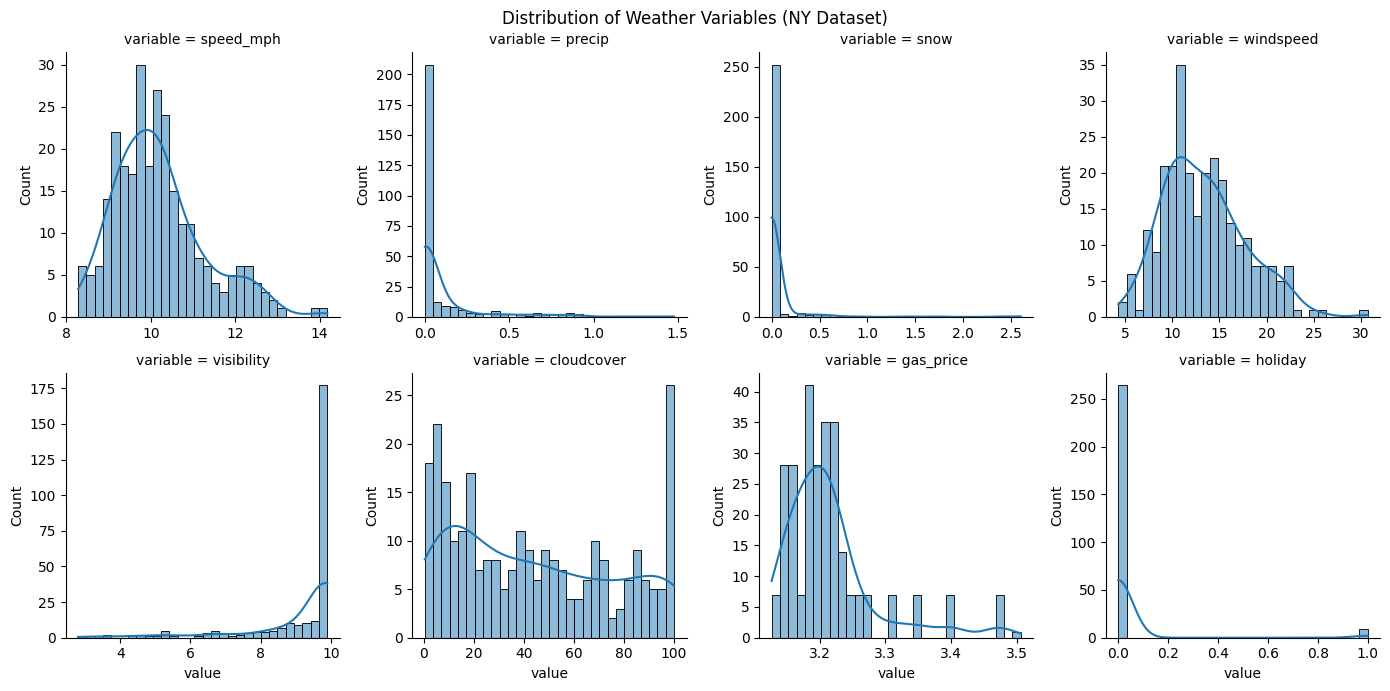

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert wide format → long format
df_long = ny[ny_col].melt(var_name="variable", value_name="value")

# Create FacetGrid (one figure with many clean subplots)
g = sns.FacetGrid(
    df_long,
    col="variable",
    col_wrap=4,         # 2 columns, adjust if you want 3
    sharex=False,
    sharey=False,
    height=3.5
)

# Add histogram + KDE to each facet
g.map(sns.histplot, "value", bins=30, kde=True)

# Title for the whole figure
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Distribution of Weather Variables (NY Dataset)")

plt.show()

In [ ]:
chi_col = ['Mean_Speed_mph', 'precip', 'snow', 'windspeed', 'visibility', 'cloudcover', 'gas_price', 'holiday']

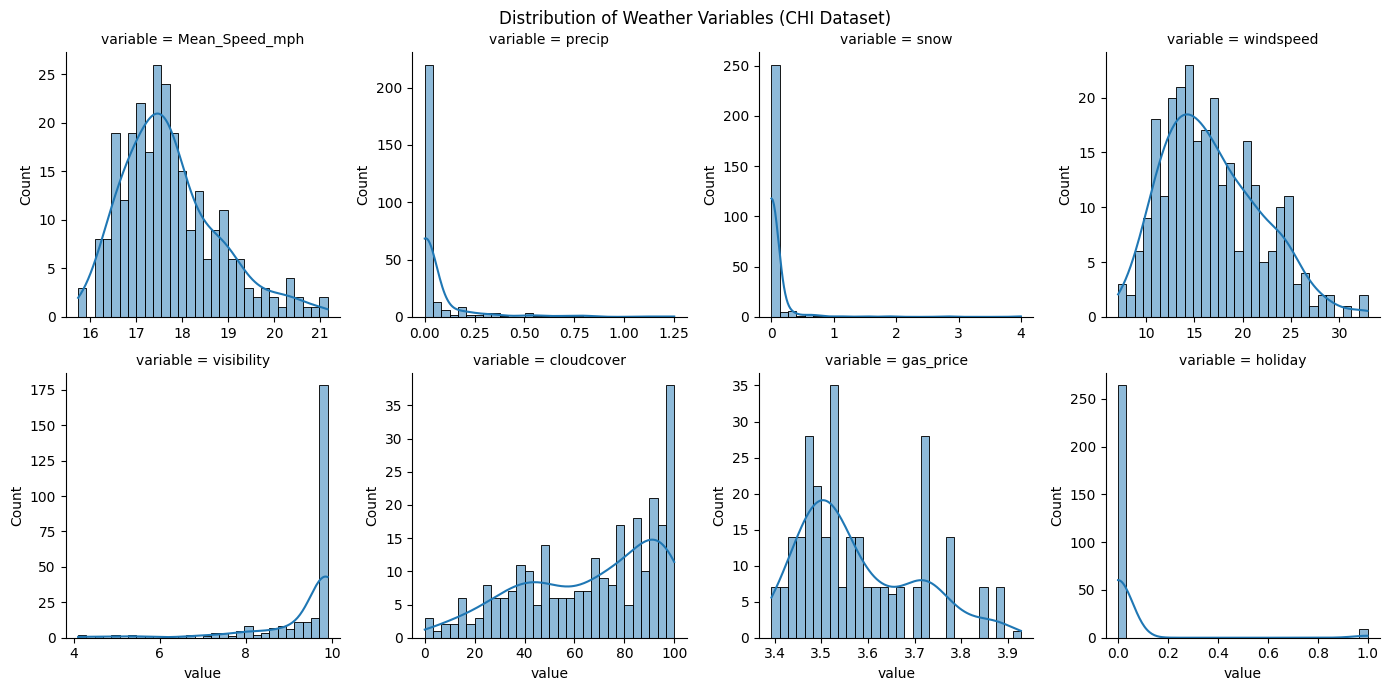

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert wide format → long format
df_long = chi[chi_col].melt(var_name="variable", value_name="value")

# Create FacetGrid (one figure with many clean subplots)
g = sns.FacetGrid(
    df_long,
    col="variable",
    col_wrap=4,         # 2 columns, adjust if you want 3
    sharex=False,
    sharey=False,
    height=3.5
)

# Add histogram + KDE to each facet
g.map(sns.histplot, "value", bins=30, kde=True)

# Title for the whole figure
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Distribution of Weather Variables (CHI Dataset)")

plt.show()

In [ ]:
chi

,date,Mean_Speed_mph,Mean_Trip_Total,Mean_Trip_Minutes,Mean_Trip_Miles,temp_max,temp_min,temp_avg,precip,snow,snowdepth,windspeed,visibility,cloudcover,solarradiation,severerisk,conditions,gas_price,holiday
0,2024-09-01,17.076620,20.972231,17.266856,5.511567,75.8,66.2,71.1,0.000,0.0,0.0,17.4,9.9,20.7,73.9,10,Partially cloudy,3.928,0.0
1,2024-09-02,21.069799,23.515918,18.236855,6.654154,74.2,60.6,67.8,0.000,0.0,0.0,11.1,9.9,29.9,69.7,10,Partially cloudy,3.882,1.0
2,2024-09-03,16.559560,21.086382,20.696728,5.643307,76.1,59.6,68.0,0.000,0.0,0.0,11.0,9.9,38.9,63.6,10,Partially cloudy,3.882,0.0
3,2024-09-04,16.567229,20.999782,19.899118,5.596708,83.5,60.4,71.7,0.000,0.0,0.0,10.5,9.9,13.5,64.6,10,Clear,3.882,0.0
4,2024-09-05,16.742910,20.926318,20.452253,5.724388,86.8,65.4,76.7,0.010,0.0,0.0,12.5,9.9,54.5,40.4,10,"Rain, Partially cloudy",3.882,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2025-05-27,17.629348,21.120425,18.872771,5.712883,66.7,54.6,60.9,0.000,0.0,0.0,13.2,9.9,90.5,75.5,10,Overcast,3.652,0.0
269,2025-05-28,16.274036,20.828392,19.439414,5.494921,62.5,55.8,58.6,0.397,0.0,0.0,10.9,9.1,96.9,43.7,10,"Rain, Overcast",3.652,0.0
270,2025-05-29,16.654272,21.749133,20.576411,5.800399,70.8,53.8,62.5,0.000,0.0,0.0,10.4,8.7,86.1,100.7,10,Partially cloudy,3.652,0.0
271,2025-05-30,16.128532,21.632156,20.857899,5.597116,73.6,54.7,66.2,0.000,0.0,0.0,16.1,9.8,62.7,101.6,10,Partially cloudy,3.652,0.0


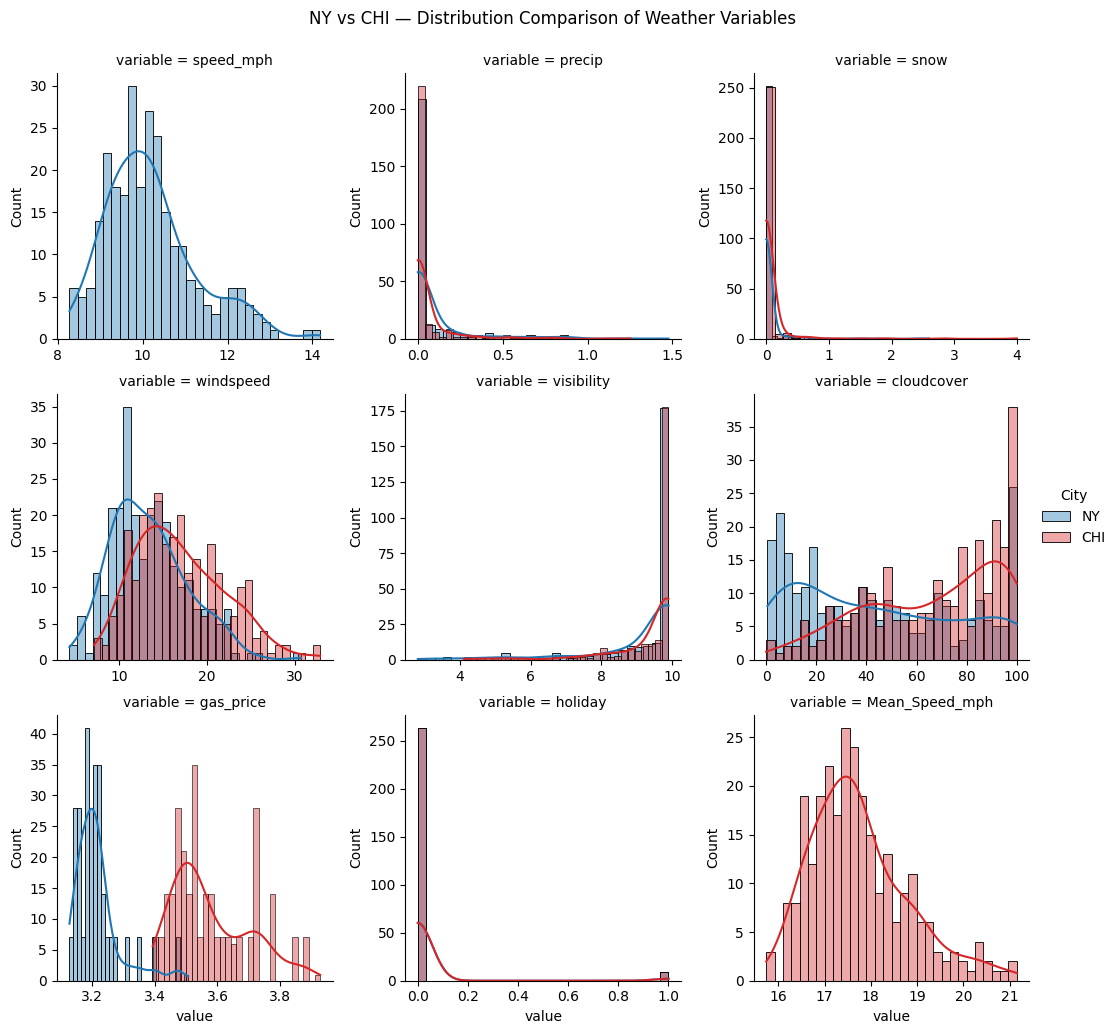

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

chi.rename(columns={"Mean_Speed_mph": "speed_mph"})

# ----- 1. Create a combined long-format dataframe -----
ny_long = ny[ny_col].melt(var_name="variable", value_name="value")
ny_long["city"] = "NY"

chi_long = chi[chi_col].melt(var_name="variable", value_name="value")
chi_long["city"] = "CHI"

df_both = pd.concat([ny_long, chi_long], ignore_index=True)

# ----- 2. Create FacetGrid: one panel per variable -----
g = sns.FacetGrid(
    df_both,
    col="variable",
    col_wrap=3,
    hue="city",           # color by city
    sharex=False,
    sharey=False,
    height=3.5,
    palette=["#1f77b4", "#d62728"]  # blue for NY, red for CHI
)

# ----- 3. Plot histogram + KDE for each city in each facet -----
g.map(sns.histplot, "value", kde=True, bins=30, alpha=0.4)

# ----- 4. Add legend and title -----
g.add_legend(title="City")

plt.subplots_adjust(top=0.92)
g.fig.suptitle("NY vs CHI — Distribution Comparison of Weather Variables")

plt.show()


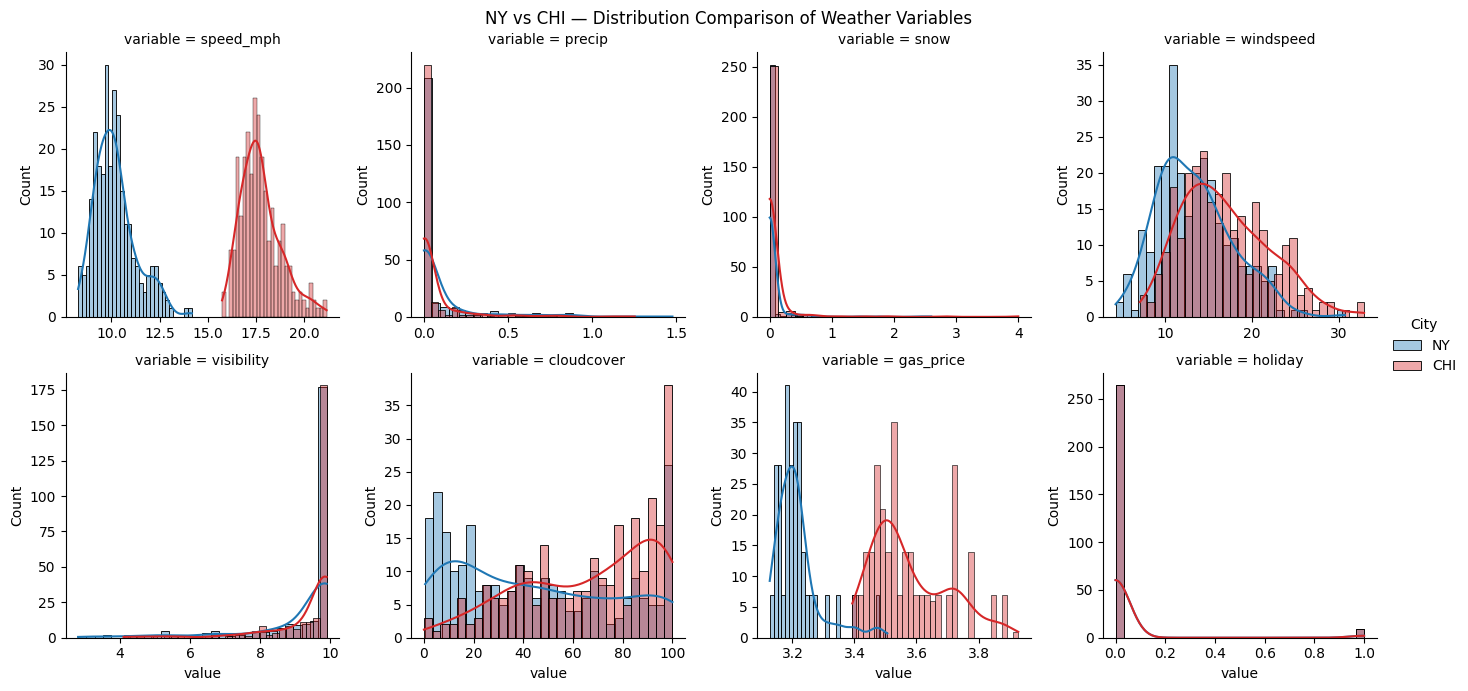

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Columns to compare (same names for both datasets)
graph_col = [
    "speed_mph",
    "precip",
    "snow",
    "windspeed",
    "visibility",
    "cloudcover",
    "gas_price",
    "holiday",
]

# 2. Make sure CHI has the same column name as NY for speed
chi_renamed = chi.rename(columns={"Mean_Speed_mph": "speed_mph"})

# 3. Convert both datasets to long format and tag city
ny_long = ny[graph_col].melt(var_name="variable", value_name="value")
ny_long["city"] = "NY"

chi_long = chi_renamed[graph_col].melt(var_name="variable", value_name="value")
chi_long["city"] = "CHI"

# 4. Combine into one dataframe
df_both = pd.concat([ny_long, chi_long], ignore_index=True)

# 5. FacetGrid: one panel per variable, colors = city
g = sns.FacetGrid(
    df_both,
    col="variable",
    col_wrap=4,
    hue="city",          # different color for NY vs CHI
    sharex=False,
    sharey=False,
    height=3.5,
    palette=["#1f77b4", "#d62728"]  # blue = NY, red = CHI
)

# 6. Plot histogram + KDE in each facet
g.map(sns.histplot, "value", bins=30, kde=True, alpha=0.4)

# 7. Legend and title
g.add_legend(title="City")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("NY vs CHI — Distribution Comparison of Weather Variables")

plt.show()


In [ ]:
chi = pd.read_csv('chi_final.csv')
ny = pd.read_csv('ny_final.csv')


In [ ]:
"""
NYC Congestion Pricing - Visualization Code
Clean, Standalone Version with All Visualizations

1. Time series with confidence bands
2. Coefficient plot (forest plot)
3. Pre-post comparison
4. Distribution comparisons
5. Weekly aggregated trends
6. Effect size visualization
7. Summary dashboard (5-panel figure)
"""

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# CONFIGURATION
# ==============================================================================

# Styling
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Colors
NYC_COLOR = '#E63946'      # Red
CHICAGO_COLOR = '#457B9D'  # Blue
TREATMENT_COLOR = 'red'     # Treatment line
POSITIVE_COLOR = '#2E7D32'  # Green (for positive significant)
NEUTRAL_COLOR = '#757575'   # Gray (for non-significant)

# File paths (change these to your data paths)
NYC_DATA_PATH = "ny_final.csv"
CHICAGO_DATA_PATH = "chi_final.csv"

# Save outputs directly into the working directory (visible on the left)
OUTPUT_DIR = "./"    # or ""

# Treatment date
TREATMENT_DATE = '2025-01-05'

# ==============================================================================
# 1. LOAD AND PREPARE DATA
# ==============================================================================

def load_and_prepare_data():
    """Load and prepare the data for analysis"""

    # Load data
    nyc_data = pd.read_csv(NYC_DATA_PATH)
    chicago_data = pd.read_csv(CHICAGO_DATA_PATH)

    # Standardize column names
    chicago_data = chicago_data.rename(columns={
        'Mean_Speed_mph': 'speed_mph',
        'Mean_Trip_Total': 'total_amount',
        'Mean_Trip_Minutes': 'ride_time_min',
        'Mean_Trip_Miles': 'trip_distance'
    })

    # Add city identifiers
    nyc_data['city'] = 'NYC'
    nyc_data['treated'] = 1
    chicago_data['city'] = 'Chicago'
    chicago_data['treated'] = 0

    # Combine datasets
    df = pd.concat([nyc_data, chicago_data], ignore_index=True)

    # Create time variables
    df['date'] = pd.to_datetime(df['date'])
    treatment_date = pd.to_datetime(TREATMENT_DATE)

    df['post'] = (df['date'] >= treatment_date).astype(int)
    df['treat_post'] = df['treated'] * df['post']
    df['year_week'] = df['date'].dt.isocalendar().year.astype(str) + '_W' + \
                      df['date'].dt.isocalendar().week.astype(str).str.zfill(2)

    return df, treatment_date

# ==============================================================================
# 2. RUN REGRESSIONS
# ==============================================================================

def run_regressions(df):
    """Run TWFE DiD regressions for all outcomes"""

    # Main model: TWFE + Weather Controls
    model_speed = ols('''speed_mph ~ treat_post + temp_avg + precip + snow +
                         windspeed + holiday + C(city) + C(year_week)''',
                      data=df).fit(cov_type='HC1')

    model_distance = ols('''trip_distance ~ treat_post + temp_avg + precip + snow +
                            windspeed + holiday + C(city) + C(year_week)''',
                         data=df).fit(cov_type='HC1')

    model_time = ols('''ride_time_min ~ treat_post + temp_avg + precip + snow +
                        windspeed + holiday + C(city) + C(year_week)''',
                     data=df).fit(cov_type='HC1')

    # Extract results
    results = {
        'speed': {
            'coef': model_speed.params['treat_post'],
            'se': model_speed.bse['treat_post'],
            'pval': model_speed.pvalues['treat_post'],
            'model': model_speed
        },
        'distance': {
            'coef': model_distance.params['treat_post'],
            'se': model_distance.bse['treat_post'],
            'pval': model_distance.pvalues['treat_post'],
            'model': model_distance
        },
        'time': {
            'coef': model_time.params['treat_post'],
            'se': model_time.bse['treat_post'],
            'pval': model_time.pvalues['treat_post'],
            'model': model_time
        }
    }

    return results

# ==============================================================================
# 3. VISUALIZATION FUNCTIONS
# ==============================================================================

def plot_timeseries_with_ci(df, treatment_date, save_path):
    """
    Figure 1: Time series with confidence bands
    Shows trends for all three outcomes with 95% confidence intervals
    """

    fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

    outcomes = [
        ('speed_mph', 'Average Speed (mph)', 'Speed'),
        ('trip_distance', 'Average Trip Distance (miles)', 'Distance'),
        ('ride_time_min', 'Average Travel Time (minutes)', 'Time')
    ]

    for idx, (var, ylabel, title) in enumerate(outcomes):
        ax = axes[idx]

        for city in ['NYC', 'Chicago']:
            city_data = df[df['city'] == city].sort_values('date')

            # 7-day rolling average
            rolling_mean = city_data.set_index('date')[var].rolling(window=7, center=True).mean()
            rolling_std = city_data.set_index('date')[var].rolling(window=7, center=True).std()

            color = NYC_COLOR if city == 'NYC' else CHICAGO_COLOR

            # Plot line
            ax.plot(rolling_mean.index, rolling_mean.values,
                   linewidth=3, label=f'{city}', color=color, alpha=0.9)

            # Confidence band (95% CI)
            ax.fill_between(rolling_mean.index,
                           rolling_mean - 1.96*rolling_std/np.sqrt(7),
                           rolling_mean + 1.96*rolling_std/np.sqrt(7),
                           alpha=0.2, color=color)

        # Treatment line
        ax.axvline(treatment_date, color=TREATMENT_COLOR, linestyle='--',
                  linewidth=2.5, label='Policy Implementation', zorder=10)
        ax.axvspan(treatment_date, df['date'].max(), alpha=0.08, color=TREATMENT_COLOR)

        # Styling
        ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
        ax.set_title(f'{title} Trends: NYC vs Chicago\n(7-day moving average with 95% CI)',
                    fontsize=13, fontweight='bold', pad=10)
        ax.legend(loc='best', fontsize=11, framealpha=0.95)
        ax.grid(True, alpha=0.3)

    axes[-1].set_xlabel('Date', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✓ Saved: {save_path}")


def plot_coefficient_forest(results, save_path):
    """
    Figure 2: Coefficient plot (forest plot)
    Shows DiD estimates with confidence intervals for all outcomes
    """

    fig, ax = plt.subplots(figsize=(12, 8))

    # Prepare data
    outcomes_list = ['Speed\n(mph)', 'Trip Distance\n(miles)', 'Travel Time\n(minutes)']
    coefs = [results['speed']['coef'], results['distance']['coef'], results['time']['coef']]
    ses = [results['speed']['se'], results['distance']['se'], results['time']['se']]
    pvals = [results['speed']['pval'], results['distance']['pval'], results['time']['pval']]

    y_pos = np.arange(len(outcomes_list))

    # Color by significance
    colors = [POSITIVE_COLOR if p < 0.001 else '#F57C00' if p < 0.05 else NEUTRAL_COLOR
              for p in pvals]

    for i, (outcome, coef, se, color) in enumerate(zip(outcomes_list, coefs, ses, colors)):
        # Point estimate
        ax.scatter(coef, i, s=200, color=color, zorder=3,
                  edgecolors='black', linewidth=2)

        # 95% CI
        ci_lower = coef - 1.96*se
        ci_upper = coef + 1.96*se
        ax.plot([ci_lower, ci_upper], [i, i], color=color, linewidth=3, zorder=2)

        # Add value labels
        ax.text(coef + 0.05, i, f'{coef:.3f}',
               va='center', fontsize=11, fontweight='bold')

    # Reference line at 0
    ax.axvline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

    # Styling
    ax.set_yticks(y_pos)
    ax.set_yticklabels(outcomes_list, fontsize=12, fontweight='bold')
    ax.set_xlabel('DiD Effect Estimate (95% Confidence Interval)',
                 fontsize=12, fontweight='bold')
    ax.set_title('Treatment Effects on All Outcomes\n(TWFE + Weather Controls)',
                fontsize=14, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, axis='x')

    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=POSITIVE_COLOR, label='p < 0.001 ***'),
        Patch(facecolor='#F57C00', label='p < 0.05 *'),
        Patch(facecolor=NEUTRAL_COLOR, label='Not Significant')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✓ Saved: {save_path}")


def plot_prepost_comparison(df, save_path):
    """
    Figure 3: Pre-post comparison bar charts
    Shows mean values before and after treatment for all outcomes
    """

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    outcomes = [
        ('speed_mph', 'Speed (mph)'),
        ('trip_distance', 'Trip Distance (miles)'),
        ('ride_time_min', 'Travel Time (min)')
    ]

    for idx, (var, title) in enumerate(outcomes):
        ax = axes[idx]

        # Calculate means
        summary = df.groupby(['city', 'post'])[var].mean().reset_index()
        summary['period'] = summary['post'].map({0: 'Pre-Policy', 1: 'Post-Policy'})
        pivot = summary.pivot(index='period', columns='city', values=var)

        x = np.arange(len(pivot.index))
        width = 0.35

        # Bars
        bars1 = ax.bar(x - width/2, pivot['NYC'], width, label='NYC',
                      color=NYC_COLOR, alpha=0.85, edgecolor='black', linewidth=2)
        bars2 = ax.bar(x + width/2, pivot['Chicago'], width, label='Chicago',
                      color=CHICAGO_COLOR, alpha=0.85, edgecolor='black', linewidth=2)

        # Add values on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.02*height,
                       f'{height:.2f}', ha='center', va='bottom',
                       fontweight='bold', fontsize=10)

        # Calculate DiD
        nyc_change = pivot.loc['Post-Policy', 'NYC'] - pivot.loc['Pre-Policy', 'NYC']
        chi_change = pivot.loc['Post-Policy', 'Chicago'] - pivot.loc['Pre-Policy', 'Chicago']
        did = nyc_change - chi_change

        # Add DiD annotation
        color = POSITIVE_COLOR if abs(did) > 0.1 else NEUTRAL_COLOR
        textstr = f'DiD: {did:.3f}'
        props = dict(boxstyle='round', facecolor=color, alpha=0.3,
                    edgecolor='black', linewidth=2)
        ax.text(0.5, 0.98, textstr, transform=ax.transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='center',
               bbox=props, fontweight='bold', color='black')

        # Styling
        ax.set_ylabel(title, fontsize=11, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(pivot.index, fontsize=11, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, axis='y')

    fig.suptitle('Pre-Post Comparison Across All Outcomes',
                fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✓ Saved: {save_path}")


def plot_distributions(df, save_path):
    """
    Figure 4: Distribution comparisons
    Shows histograms of outcomes pre- and post-policy
    """

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    outcomes = [
        ('speed_mph', 'Speed (mph)'),
        ('trip_distance', 'Trip Distance (miles)'),
        ('ride_time_min', 'Travel Time (min)')
    ]

    for idx, (var, title) in enumerate(outcomes):
        # Pre-period
        ax1 = axes[0, idx]
        pre_nyc = df[(df['city'] == 'NYC') & (df['post'] == 0)][var]
        pre_chi = df[(df['city'] == 'Chicago') & (df['post'] == 0)][var]

        ax1.hist(pre_nyc, bins=30, alpha=0.7, label='NYC',
                color=NYC_COLOR, edgecolor='black')
        ax1.hist(pre_chi, bins=30, alpha=0.7, label='Chicago',
                color=CHICAGO_COLOR, edgecolor='black')
        ax1.axvline(pre_nyc.mean(), color=NYC_COLOR, linestyle='--', linewidth=2)
        ax1.axvline(pre_chi.mean(), color=CHICAGO_COLOR, linestyle='--', linewidth=2)
        ax1.set_title(f'Pre-Policy: {title}', fontsize=11, fontweight='bold')
        ax1.set_xlabel(title, fontsize=10)
        ax1.set_ylabel('Frequency', fontsize=10)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Post-period
        ax2 = axes[1, idx]
        post_nyc = df[(df['city'] == 'NYC') & (df['post'] == 1)][var]
        post_chi = df[(df['city'] == 'Chicago') & (df['post'] == 1)][var]

        ax2.hist(post_nyc, bins=30, alpha=0.7, label='NYC',
                color=NYC_COLOR, edgecolor='black')
        ax2.hist(post_chi, bins=30, alpha=0.7, label='Chicago',
                color=CHICAGO_COLOR, edgecolor='black')
        ax2.axvline(post_nyc.mean(), color=NYC_COLOR, linestyle='--', linewidth=2)
        ax2.axvline(post_chi.mean(), color=CHICAGO_COLOR, linestyle='--', linewidth=2)
        ax2.set_title(f'Post-Policy: {title}', fontsize=11, fontweight='bold')
        ax2.set_xlabel(title, fontsize=10)
        ax2.set_ylabel('Frequency', fontsize=10)
        ax2.legend()
        ax2.grid(True, alpha=0.3)

    fig.suptitle('Distribution Comparison: Pre vs Post Policy',
                fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✓ Saved: {save_path}")


def plot_weekly_trends(df, treatment_date, save_path):
    """
    Figure 5: Weekly aggregated trends
    Shows weekly averages without smoothing
    """

    fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

    outcomes = [
        ('speed_mph', 'Weekly Avg Speed (mph)'),
        ('trip_distance', 'Weekly Avg Distance (miles)'),
        ('ride_time_min', 'Weekly Avg Time (min)')
    ]

    for idx, (var, ylabel) in enumerate(outcomes):
        ax = axes[idx]

        # Aggregate by week
        weekly = df.groupby(['year_week', 'city'])[var].mean().reset_index()
        weekly = weekly.merge(df[['year_week', 'date']].drop_duplicates(), on='year_week')
        weekly = weekly.sort_values('date')

        for city in ['NYC', 'Chicago']:
            city_data = weekly[weekly['city'] == city]
            color = NYC_COLOR if city == 'NYC' else CHICAGO_COLOR
            ax.plot(city_data['date'], city_data[var],
                   marker='o', linewidth=2.5, markersize=6,
                   label=f'{city}', color=color, alpha=0.9)

        # Treatment line
        ax.axvline(treatment_date, color=TREATMENT_COLOR, linestyle='--',
                  linewidth=2.5, alpha=0.7)
        ax.axvspan(treatment_date, df['date'].max(), alpha=0.08, color=TREATMENT_COLOR)

        ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
        ax.legend(loc='best', fontsize=11)
        ax.grid(True, alpha=0.3)

    axes[0].set_title('Weekly Aggregated Trends (No Smoothing)',
                     fontsize=14, fontweight='bold', pad=10)
    axes[-1].set_xlabel('Date', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✓ Saved: {save_path}")


def plot_effect_sizes(df, results, save_path):
    """
    Figure 6: Effect size interpretation
    Shows absolute and percentage changes
    """

    fig, ax = plt.subplots(figsize=(12, 8))

    # Calculate percentage changes
    pre_nyc_speed = df[(df['city'] == 'NYC') & (df['post'] == 0)]['speed_mph'].mean()
    pre_nyc_time = df[(df['city'] == 'NYC') & (df['post'] == 0)]['ride_time_min'].mean()

    pct_change_speed = (results['speed']['coef'] / pre_nyc_speed) * 100
    pct_change_time = (results['time']['coef'] / pre_nyc_time) * 100

    # Data
    effects = ['Speed Increase\n(mph)', 'Travel Time\nReduction (min)',
              'Speed Increase\n(%)', 'Time Reduction\n(%)']
    values = [results['speed']['coef'], -results['time']['coef'],
              pct_change_speed, -pct_change_time]
    colors = [POSITIVE_COLOR, POSITIVE_COLOR, '#1976D2', '#1976D2']

    y_pos = np.arange(len(effects))

    bars = ax.barh(y_pos, values, color=colors, alpha=0.85,
                   edgecolor='black', linewidth=2)

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, values)):
        width = bar.get_width()
        ax.text(width + 0.05*max(values), bar.get_y() + bar.get_height()/2,
               f'{val:.2f}', ha='left', va='center',
               fontweight='bold', fontsize=12)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(effects, fontsize=12, fontweight='bold')
    ax.set_xlabel('Effect Size', fontsize=12, fontweight='bold')
    ax.set_title('Policy Impact: Effect Sizes\n(TWFE + Weather Controls)',
                fontsize=14, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, axis='x')

    # Add baseline reference
    textstr = f'Baseline NYC Speed: {pre_nyc_speed:.2f} mph\nBaseline NYC Time: {pre_nyc_time:.2f} min'
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=10,
           verticalalignment='bottom', horizontalalignment='right', bbox=props)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✓ Saved: {save_path}")


def plot_summary_dashboard(df, results, treatment_date, save_path):
    """
    Figure 7: Comprehensive summary dashboard
    5-panel figure showing all key results
    """

    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    # Panel A: Time series
    ax1 = fig.add_subplot(gs[0, :])
    for city in ['NYC', 'Chicago']:
        city_data = df[df['city'] == city]
        rolling = city_data.set_index('date')['speed_mph'].rolling(window=7, center=True).mean()
        color = NYC_COLOR if city == 'NYC' else CHICAGO_COLOR
        ax1.plot(rolling.index, rolling.values, linewidth=3, label=f'{city}', color=color)

    ax1.axvline(treatment_date, color=TREATMENT_COLOR, linestyle='--',
               linewidth=2.5, label='Policy')
    ax1.axvspan(treatment_date, df['date'].max(), alpha=0.1, color=TREATMENT_COLOR)
    ax1.set_ylabel('Speed (mph)', fontsize=11, fontweight='bold')
    ax1.set_title('A. Speed Trends Over Time', fontsize=12, fontweight='bold', loc='left')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Panel B: Coefficient plot
    ax2 = fig.add_subplot(gs[1, 0])
    outcomes_list = ['Speed', 'Distance', 'Time']
    coefs = [results['speed']['coef'], results['distance']['coef'], results['time']['coef']]
    ses = [results['speed']['se'], results['distance']['se'], results['time']['se']]
    y_pos = np.arange(len(outcomes_list))

    for i, (coef, se) in enumerate(zip(coefs, ses)):
        ax2.scatter(coef, i, s=150, color=POSITIVE_COLOR, zorder=3,
                   edgecolors='black', linewidth=2)
        ax2.plot([coef-1.96*se, coef+1.96*se], [i, i],
                color=POSITIVE_COLOR, linewidth=2)

    ax2.axvline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(outcomes_list, fontsize=10, fontweight='bold')
    ax2.set_xlabel('DiD Estimate', fontsize=10, fontweight='bold')
    ax2.set_title('B. Treatment Effects', fontsize=12, fontweight='bold', loc='left')
    ax2.grid(True, alpha=0.3, axis='x')

    # Panel C: Pre-post for speed
    ax3 = fig.add_subplot(gs[1, 1])
    summary = df.groupby(['city', 'post'])['speed_mph'].mean().reset_index()
    summary['period'] = summary['post'].map({0: 'Pre', 1: 'Post'})
    pivot = summary.pivot(index='period', columns='city', values='speed_mph')
    x = np.arange(len(pivot.index))
    width = 0.35
    ax3.bar(x - width/2, pivot['NYC'], width, label='NYC',
           color=NYC_COLOR, alpha=0.85, edgecolor='black', linewidth=2)
    ax3.bar(x + width/2, pivot['Chicago'], width, label='Chicago',
           color=CHICAGO_COLOR, alpha=0.85, edgecolor='black', linewidth=2)
    ax3.set_xticks(x)
    ax3.set_xticklabels(pivot.index, fontsize=10, fontweight='bold')
    ax3.set_ylabel('Speed (mph)', fontsize=10, fontweight='bold')
    ax3.set_title('C. Pre-Post: Speed', fontsize=12, fontweight='bold', loc='left')
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3, axis='y')

    # Panel D: Effect sizes
    ax4 = fig.add_subplot(gs[1, 2])
    pre_nyc_speed = df[(df['city'] == 'NYC') & (df['post'] == 0)]['speed_mph'].mean()
    pct_change_speed = (results['speed']['coef'] / pre_nyc_speed) * 100

    effects = ['Speed\n(+mph)', 'Time\n(-min)', 'Speed\n(+%)']
    values = [results['speed']['coef'], -results['time']['coef'], pct_change_speed]
    colors = [POSITIVE_COLOR, POSITIVE_COLOR, '#1976D2']
    y_pos = np.arange(len(effects))
    bars = ax4.barh(y_pos, values, color=colors, alpha=0.85,
                    edgecolor='black', linewidth=2)
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(effects, fontsize=10, fontweight='bold')
    ax4.set_xlabel('Effect Size', fontsize=10, fontweight='bold')
    ax4.set_title('D. Effect Sizes', fontsize=12, fontweight='bold', loc='left')
    ax4.grid(True, alpha=0.3, axis='x')

    # Panel E: Weekly trends
    ax5 = fig.add_subplot(gs[2, :])
    weekly = df.groupby(['year_week', 'city'])['speed_mph'].mean().reset_index()
    weekly = weekly.merge(df[['year_week', 'date']].drop_duplicates(), on='year_week')
    weekly = weekly.sort_values('date')

    for city in ['NYC', 'Chicago']:
        city_data = weekly[weekly['city'] == city]
        color = NYC_COLOR if city == 'NYC' else CHICAGO_COLOR
        ax5.plot(city_data['date'], city_data['speed_mph'],
               marker='o', linewidth=2, markersize=5, label=f'{city}', color=color, alpha=0.9)

    ax5.axvline(treatment_date, color=TREATMENT_COLOR, linestyle='--',
               linewidth=2.5, alpha=0.7)
    ax5.set_ylabel('Speed (mph)', fontsize=11, fontweight='bold')
    ax5.set_xlabel('Date', fontsize=11, fontweight='bold')
    ax5.set_title('E. Weekly Aggregated Speed Trends', fontsize=12, fontweight='bold', loc='left')
    ax5.legend(fontsize=10)
    ax5.grid(True, alpha=0.3)

    # Main title
    fig.suptitle('NYC Congestion Pricing Impact: Summary Dashboard\n(TWFE DiD with Weather Controls)',
                fontsize=16, fontweight='bold', y=0.995)

    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✓ Saved: {save_path}")

# ==============================================================================
# 4. MAIN EXECUTION
# ==============================================================================

def main():
    """Main function to run all visualizations"""

    print("="*80)
    print("NYC CONGESTION PRICING - VISUALIZATION SCRIPT")
    print("="*80)

    # Load data
    print("\n[1/8] Loading and preparing data...")
    df, treatment_date = load_and_prepare_data()
    print(f"  ✓ Loaded {len(df)} observations")
    print(f"  ✓ Treatment date: {treatment_date.date()}")

    # Run regressions
    print("\n[2/8] Running TWFE DiD regressions...")
    results = run_regressions(df)
    print(f"  ✓ Speed effect: {results['speed']['coef']:.4f} mph (p={results['speed']['pval']:.6f})")
    print(f"  ✓ Time effect: {results['time']['coef']:.4f} min (p={results['time']['pval']:.6f})")
    print(f"  ✓ Distance effect: {results['distance']['coef']:.4f} mi (p={results['distance']['pval']:.6f})")

    # Create visualizations
    print("\n[3/8] Creating time series with confidence bands...")
    plot_timeseries_with_ci(df, treatment_date, OUTPUT_DIR + 'viz_timeseries_trends.png')

    print("\n[4/8] Creating coefficient plot...")
    plot_coefficient_forest(results, OUTPUT_DIR + 'viz_coefficient_plot.png')

    print("\n[5/8] Creating pre-post comparison...")
    plot_prepost_comparison(df, OUTPUT_DIR + 'viz_prepost_comparison.png')

    print("\n[6/8] Creating distribution comparisons...")
    plot_distributions(df, OUTPUT_DIR + 'viz_distributions.png')

    print("\n[7/8] Creating weekly trends...")
    plot_weekly_trends(df, treatment_date, OUTPUT_DIR + 'viz_weekly_trends.png')

    print("\n[8/8] Creating effect sizes plot...")
    plot_effect_sizes(df, results, OUTPUT_DIR + 'viz_effect_sizes.png')

    print("\n[BONUS] Creating summary dashboard...")
    plot_summary_dashboard(df, results, treatment_date, OUTPUT_DIR + 'viz_summary_dashboard.png')

    print("\n" + "="*80)
    print("ALL VISUALIZATIONS COMPLETE!")
    print("="*80)
    print(f"\nFiles saved to: {OUTPUT_DIR}")
    print("\nCreated files:")
    print("  1. viz_timeseries_trends.png - Time series with CI")
    print("  2. viz_coefficient_plot.png - Forest plot")
    print("  3. viz_prepost_comparison.png - Pre-post bars")
    print("  4. viz_distributions.png - Histograms")
    print("  5. viz_weekly_trends.png - Weekly data")
    print("  6. viz_effect_sizes.png - Effect sizes")
    print("  7. viz_summary_dashboard.png - 5-panel dashboard")
    print("="*80)

if __name__ == "__main__":
    main()

NYC CONGESTION PRICING - VISUALIZATION SCRIPT

[1/8] Loading and preparing data...
  ✓ Loaded 546 observations
  ✓ Treatment date: 2025-01-05

[2/8] Running TWFE DiD regressions...
  ✓ Speed effect: 0.8037 mph (p=0.000000)
  ✓ Time effect: -1.6901 min (p=0.000000)
  ✓ Distance effect: 0.0553 mi (p=0.196447)

[3/8] Creating time series with confidence bands...
✓ Saved: ./viz_timeseries_trends.png

[4/8] Creating coefficient plot...
✓ Saved: ./viz_coefficient_plot.png

[5/8] Creating pre-post comparison...
✓ Saved: ./viz_prepost_comparison.png

[6/8] Creating distribution comparisons...
✓ Saved: ./viz_distributions.png

[7/8] Creating weekly trends...
✓ Saved: ./viz_weekly_trends.png

[8/8] Creating effect sizes plot...
✓ Saved: ./viz_effect_sizes.png

[BONUS] Creating summary dashboard...
✓ Saved: ./viz_summary_dashboard.png

ALL VISUALIZATIONS COMPLETE!

Files saved to: ./

Created files:
  1. viz_timeseries_trends.png - Time series with CI
  2. viz_coefficient_plot.png - Forest plot
 

*DID*